In [ ]:
## To Hide or Show Code Blocks
from IPython.display import HTML
hidecode=HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

hidecode

In [1]:
import glob, os 
import dill
# print("CSV Files present in the directory:\n", '\n'.join(glob.glob(CheckPoint_Dir + '*.{}'.format('CheckPt')))) #../input

def WorkspaceBasedCheckPt(CheckPtPosition = 0, AccessRecentOrNewWorkSpaceImage = False, Force = {'access':False, 'task':'load'}, CheckPoint_Dir = "NotebookCheckpoints/"):
    if not os.path.exists(CheckPoint_Dir):
        os.makedirs(CheckPoint_Dir)
        file= open((CheckPoint_Dir + '0__CheckPt.db'),"w+")
        file.close()
    LastCheckPt = max([int(CheckPoint.split('/')[len(CheckPoint.split('/')) -1].split('__')[0]) for CheckPoint in glob.glob(CheckPoint_Dir + '*{}'.format('CheckPt.db'))])
    
    ## Force can be used when proceding in non serialized manner
    if Force['access']: ## could have been compressed with chunk below using boolean algebra to make code more smaller
        AccessRecentOrNewWorkSpaceImage = False
        if Force['task'] == 'load':
            print("Checkpoint ", CheckPtPosition, "is to be loaded")
            if os.path.exists(CheckPoint_Dir + str(CheckPtPosition) + '__CheckPt.db'):
                dill.load_session(CheckPoint_Dir + str(CheckPtPosition) + '__CheckPt.db') # To restore a session
            else:
                print("This checkpoint doesn't exist, hence won't be loaded.")
        elif Force['task'] == 'save':
            print("Checkpoint ", CheckPtPosition, "is to be Saved")
            dill.dump_session(CheckPoint_Dir + str(CheckPtPosition) + '__CheckPt.db') # To Save a session
        return "Force used to {} workspace checkpoint_{}.".format(Force['task'], CheckPtPosition) ## exit here only
    
    
    ## This Code below is used to handle the actions on returning the value to run/not run the cell
    ### = is set so that the current check point cell code are able to run
    if ((AccessRecentOrNewWorkSpaceImage == False) and (CheckPtPosition <= LastCheckPt)):
        print('Most Recent Checkpoint is : {} \nHence, cells won\'t be running content untill most recent checkpoint is crossed.'.format(LastCheckPt))
        return False
    elif ((AccessRecentOrNewWorkSpaceImage == False) and (CheckPtPosition == (LastCheckPt +1))):
        print('Running this cell')
        return True
    elif ((AccessRecentOrNewWorkSpaceImage == False) and (CheckPtPosition > (LastCheckPt +1))):
        print("You have skipped over a checkpoint. Still running this cell")
        return True
    
    ## This Code below is used to handle the actions on saving/loading the workspace images
    if (AccessRecentOrNewWorkSpaceImage and (CheckPtPosition == 0)):
        print("Initial Phase, hence not saving workspace.")
    elif (AccessRecentOrNewWorkSpaceImage and (LastCheckPt > CheckPtPosition)):
        print("This is not the most recent checkpoint, hence not loading it. [Use Force to force load a checkpoint]")
    elif (AccessRecentOrNewWorkSpaceImage and (LastCheckPt == CheckPtPosition)):
        dill.load_session(CheckPoint_Dir + str(CheckPtPosition) + '__CheckPt.db') # To restore a session
        print("This is the most recent checkpoint, hence loading it.")
    elif (AccessRecentOrNewWorkSpaceImage and ((LastCheckPt +1) == CheckPtPosition)):
        dill.dump_session(CheckPoint_Dir + str(CheckPtPosition) + '__CheckPt.db') # To Save a session
        print("Congrats, on reaching a new checkpoint, saving it.")
    elif (AccessRecentOrNewWorkSpaceImage and ((LastCheckPt +1) < CheckPtPosition)):
        print("You have skipped over a checkpoint. Hence not Saving anything.")
    
    
# https://stackoverflow.com/questions/26873127/show-dataframe-as-table-in-ipython-notebook/29665452

In [2]:
#WorkspaceBasedCheckPt(103, False, {'access':True, 'task':'save'})

In [3]:
import sys
print("System Version")
print(sys.version)

System Version
3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


In [4]:
os.getcwd()
## Getting and setting the current directory as working directory
# os.chdir(os.getcwd())

'/home/ubuntu/users/mohit/Embedding/SentAnalysis'

#### Skip to the Checkpoint:<a class="anchor" id="checkpoints"></a>
* [Checkpoint_1](#check1)
* [Checkpoint_2](#check2)
* [Checkpoint_3](#check3)
* [Checkpoint_4](#check4)

![](http://paxcom.net/wp-content/uploads/2016/09/Words.png)

# Sentiment Analysis  
  
Data can be downloaded from [this link](http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip).  

The data is present in a CSV with emoticons removed. This file contains 6 fields:  
1. **Polarity** of the tweet (0 = negative, 2 = neutral, 4 = positive)
2. **ID** of the tweet (2087)
3. **Date** of the tweet (Sat May 16 23:58:44 UTC 2009)
4. **Query (lyx)** If there is no query, then this value is NO_QUERY.
5. **User** that tweeted (robotickilldozr)
6. **Text** of the tweet (Lyx is cool)


![](https://gridakl.com/wp-content/uploads/2018/03/main-qimg-8c1c4d5447ad8429e847b2c7aa9f7246.png)

![alt text](https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 1")

Reference-style: 
![alt text][logo]
[logo]: https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 2"

<img src="http://newsroom.unl.edu/announce/files/file36649.jpg" alt="IMAGE ALT TEXT HERE" width="100" height="100" border="10" />

<h2><img src="https://journals.aom.org/pb-assets/images/icons/DElogoAMJ.png" alt="roundtoc" style="float:left;width:40px;height:40px;"> Table Of Content:<a class="anchor" id="TOC"></a></h2>
[Configuration Block](#H0)  
(([Checkpoint 1](#check1)))
1. [Importing the Libraries](#H1)  
2. [Importing the Data](#H2)  
3. [Understanding the Data](#H3)  
4. [Data Preprocessing](#H4)  
    a. [Removing unecessary Variables](#H4a)  
    b. [Changing the Class Name](#H4b)  
    c. [Adding New Variable](#H4c)  
    d. [Cleaning the text](#H4d)  
    e. [Saving Cleaned Data as tsv](#H4e)  
(([Checkpoint 2](#check2)))
5. [Data Exploration and Visualization](#H5)  
6. [Model Development](#H6)
<img src="http://newsroom.unl.edu/announce/files/file36649.jpg" alt="TOC" style="float:right;width:100px;height:100px;">



<h2><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTPskj1g-Ri8Bb5tiVKNaJtGjM4nKFZ84SaHM78R2amyGwL3Ok" alt="roundtoc" style="float:left;width:40px;height:40px;">   <b>Configuration Block</b><a class="anchor" id="H0"></a></h2>
[Go to TOC](#TOC)

In [5]:
config = {
    'input_dir': 'inputs/',
    'training_file': 'training.1600000.processed.noemoticon.csv',
    'test_file':'testdata.manual.2009.06.14.csv',
    'training_file_cleaned': 'CleanedTrainingData.csv',
    'test_file_cleaned': 'CleanedTestData.csv',
    'term_frequency_file': "TermFrequency.csv",
    'Train:Val:TestSplit': '98:1:1'

#     'DimensionalityTransformationAlgo':['PCA', 'ICA'],

#     'bq_env': {'edit_query': 'Yes', 
#                'bq_query_template_file': 'QueryTemplateClustering.txt', 
#                'sid': ['1071'] ,
#                'date': ['010218'],
#                'MaxNoObsToGet': '1000000'},

#     'Trial':["ABC","DEF","GHI"],
}

In [6]:
# for i in dict.keys():
#     for j in dict[i]:
#         print(i, "    ", j, "   ",dict[i][0])

# from datetime import date, timedelta
# CurrentDate = date((2000 + int(TableDate[0][4:6])), int(TableDate[0][2:4]),int(TableDate[0][0:2])) 
# format = "%d%m%y"   #"%a %b %d %H:%M:%S %Y"
# TablesToCheck = [(CurrentDate + timedelta(days=i)).strftime(format) for i in range(int(TableWindow))]
# TablesToCheck

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;1. Importing the Libraries</b><a class="anchor" id="H1"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

In [7]:
import time
# start_time = time.time()

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
plt.style.use('fivethirtyeight')
%matplotlib inline
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

# HeadingBreaker = "======================================================================================\n"
# SubHeadingBreaker = "--------------------------------------------------------------------------------------\n"
# NotebookProcessCatalog = "Process Followed Log\n" + HeadingBreaker
# end_time = time.time()
# print('Time taken {:.4f} s'.format(end_time - start_time))

<h2><img src="http://sierraexpressmedia.com/wp-content/uploads/2016/01/checkpoint.png" alt="roundtoc" style="float:left;width:60px;height:60px;"><b>&emsp;Checkpoint 1 Reached</b><a class="anchor" id="check1"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;[Checkpoint_Head](#checkpoints)  
Progress until this point will be saved as Checkpoint1(reached) further to this checkpoint2 start

In [8]:
WorkspaceBasedCheckPt(1, True)
ChPt = 2

This is not the most recent checkpoint, hence not loading it. [Use Force to force load a checkpoint]


<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;2. Importing the Data</b><a class="anchor" id="H2"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

In [9]:
if WorkspaceBasedCheckPt(ChPt):
    
    from subprocess import check_output
    # print("CSV Files present in the directory:", check_output(["ls", "*.csv"]).decode("utf8")) #../input
    print("CSV Files present in the directory:\n", '\n'.join(glob.glob(config['input_dir'] + '*.{}'.format('csv')))) #../input

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [10]:
if WorkspaceBasedCheckPt(ChPt):
    
    cols = ['sentiment_class','id','date','query_string','user','text']
    train_DF = pd.read_csv(config['input_dir'] + config['training_file'], encoding="ISO-8859-1", header=None, names=cols)
    test_DF = pd.read_csv(config['input_dir'] + config['test_file'], encoding="ISO-8859-1", header=None, names=cols)
    print("Train Dataset Shape :", train_DF.shape)
    print("Test Dataset Shape :", test_DF.shape)
    display(train_DF.head())

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [11]:
############## Delete this in the Final Run
train_DF = train_DF.sample(frac=0.05).reset_index(drop=True)
train_DF.shape

NameError: name 'train_DF' is not defined

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;3. Understanding the Data</b><a class="anchor" id="H3"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

In [12]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Observing the structure of Train dataset")
    print("Train Dataset Shape :", train_DF.shape)
    VarDataType_DF = pd.DataFrame(train_DF.dtypes).reset_index().rename(columns = {'index' : 'VariableName', 0 : 'DataType'})
    Miss_DF = pd.DataFrame(train_DF.isnull().sum()).reset_index().rename(columns = {'index' : 'VariableName', 0 : '#OfMissingObs'})
    Uniq_DF = pd.DataFrame({'VariableName': [col for col in train_DF.columns], '#OfUniqueValue': [len(train_DF[col].unique()) for col in train_DF.columns]}, columns = ['VariableName', '#OfUniqueValue'])
    Prop_DF = train_DF.describe().T.reset_index().rename(columns = {'index': 'VariableName'})
    display(VarDataType_DF.set_index('VariableName').join(Miss_DF.set_index('VariableName')).join(Uniq_DF.set_index('VariableName')).join(Prop_DF.set_index('VariableName')).fillna('-').reset_index())

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [13]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Observing the structure of Test dataset")
    print("Test Dataset Shape :", test_DF.shape)
    VarDataType_DF = pd.DataFrame(test_DF.dtypes).reset_index().rename(columns = {'index' : 'VariableName', 0 : 'DataType'})
    Miss_DF = pd.DataFrame(test_DF.isnull().sum()).reset_index().rename(columns = {'index' : 'VariableName', 0 : '#OfMissingObs'})
    Uniq_DF = pd.DataFrame({'VariableName': [col for col in test_DF.columns], '#OfUniqueValue': [len(test_DF[col].unique()) for col in test_DF.columns]}, columns = ['VariableName', '#OfUniqueValue'])
    Prop_DF = test_DF.describe().T.reset_index().rename(columns = {'index': 'VariableName'})
    display(VarDataType_DF.set_index('VariableName').join(Miss_DF.set_index('VariableName')).join(Prop_DF.set_index('VariableName')).fillna('-').reset_index())

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [14]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Printing top 10 obs/class in each object variable in Trainset")
    for VarName in train_DF.columns:
        if (train_DF[VarName].dtypes == object):
            print("\n***********************************************************************")
            print("\nAnalyzing the Variable:", VarName)
            print("Variable datatype:", train_DF[VarName].dtypes)
    #         print("Missing Values:", train_DF[VarName].isnull().sum())
    #         print(TrainDF[VarName].describe())
            display(pd.DataFrame(train_DF[VarName].value_counts()).reset_index().rename(columns = {'index' : 'Value', VarName : 'Frequency'}).head(10))

    #     if ((TrainDF[VarName].dtypes == float) | (TrainDF[VarName].dtypes == int)):
    #         print(pd.DataFrame(TrainDF[VarName].describe()).reset_index().rename(columns = {'index' : 'Property'}))
    #         print(TrainDF[VarName].value_counts()    

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [15]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Printing top 10 obs/class in each object variable in Trainset")
    for VarName in test_DF.columns:
        if (test_DF[VarName].dtypes == object):
            print("\n***********************************************************************")
            print("\nAnalyzing the Variable:", VarName)
            print("Variable datatype:", test_DF[VarName].dtypes)
    #         print("Missing Values:", test_DF[VarName].isnull().sum())
    #         print(test_DF[VarName].describe())
            display(pd.DataFrame(test_DF[VarName].value_counts()).reset_index().rename(columns = {'index' : 'Value', VarName : 'Frequency'}).head(10))

    #     if ((test_DF[VarName].dtypes == float) | (test_DF[VarName].dtypes == int)):
    #         print(pd.DataFrame(test_DF[VarName].describe()).reset_index().rename(columns = {'index' : 'Property'}))
    #         print(test_DF[VarName].value_counts()    

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


Our reponse variable is "sentiment_class" so let's observe the content with its class

In [16]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF["sentiment_class"].value_counts().reset_index().rename(columns = {'index' : 'Sentiment_Class_Value', 'sentiment_class' : 'Frequency'}))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [17]:
if WorkspaceBasedCheckPt(ChPt):
    
    pd.set_option('display.height', 10000)
    pd.set_option('display.max_colwidth', 180)
    pd.set_option('display.width', 1000)
    pd.set_option('display.max_rows', 200)
    pd.set_option('display.max_columns', 500)
    display(train_DF.loc[train_DF["sentiment_class"] == 0].head(10))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [18]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF.loc[train_DF["sentiment_class"] == 4].head(10))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;4. Data Preprocessing</b><a class="anchor" id="H4"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

### 4.1. Removing unecessary Variables <a class="anchor" id="H4a">

In [19]:
if WorkspaceBasedCheckPt(ChPt):
    
    # del()
    ## To Trainset
    train_DF.drop(['id','date','query_string','user'],axis=1,inplace=True)
    ## To Testset
    test_DF.drop(['id','date','query_string','user'],axis=1,inplace=True)

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [20]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Trainset Shape:", train_DF.shape)
    print("Trainset Shape:", test_DF.shape)

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


### 4.2. Changing the Class Name <a class="anchor" id="H4b">

In [21]:
## For Testset maintaining only those observation whose class are present in Trainset
test_DF = test_DF.loc[[elem in [0,4] for elem in test_DF['sentiment_class']]].reset_index(drop=True)

NameError: name 'test_DF' is not defined

In [22]:
if WorkspaceBasedCheckPt(ChPt):
    
    ## To Trainset
    train_DF['sentiment_class'] = train_DF['sentiment_class'].map({0: 0, 4: 1})
    ## To Testset
    test_DF['sentiment_class'] = test_DF['sentiment_class'].map({0: 0, 4: 1})
    display(train_DF["sentiment_class"].value_counts().reset_index().rename(columns = {'index' : 'Sentiment_Class_Value', 'sentiment_class' : 'Frequency'}))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


### 4.3. Adding New Variable <a class="anchor" id="H4c">

In [23]:
if WorkspaceBasedCheckPt(ChPt):
    
    ## To Trainset
    train_DF['pre_clean_len_text'] = [len(le) for le in train_DF.text]
    ## To Testset
    test_DF['pre_clean_len_text'] = [len(le) for le in test_DF.text]
    print("Updated Shape", train_DF.shape)
    display(train_DF.head())

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [24]:
if WorkspaceBasedCheckPt(ChPt):
    
    f, (ax_box, ax_hist) = plt.subplots(figsize=(12, 6), nrows=2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(train_DF['pre_clean_len_text'], ax=ax_box)
    sns.distplot(train_DF['pre_clean_len_text'], ax=ax_hist, bins = 350)
    ax_box.set(xlabel='')

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [25]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF.loc[train_DF['pre_clean_len_text'] > 140].head())

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


### 4.4. Cleaning the text <a class="anchor" id="H4d">

#### 4.4.1.1. Cleaning the @user

In [26]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF['text'][343])

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [27]:
if WorkspaceBasedCheckPt(ChPt):
    
    import re
    display(re.sub(r'@[A-Za-z0-9_]+','',train_DF['text'][343]))
    # [word for word in train_DF['text'][343].split(' ') if word[0] != '@']

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


#### 4.4.1.2. HTML decoding

In [28]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF['text'][343])

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [29]:
if WorkspaceBasedCheckPt(ChPt):
    
    from bs4 import BeautifulSoup
    example1 = BeautifulSoup(train_DF['text'][343], 'lxml')
    display(example1.get_text())

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


#### 4.4.1.3. Cleaning the other encoding

In [30]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF['text'][226])

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [31]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF['text'][226].encode("utf-8-sig"))#.decode('utf-8-sig') #.decode('utf_8')

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [32]:
if WorkspaceBasedCheckPt(ChPt):
    
    # train_DF['text'][226].replace(u"ï¿½", "?")
    display(re.sub('ï¿½[A-Za-z0-9]+ ', ' ?? ',train_DF['text'][226]))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


#### 4.4.1.4. Links

In [33]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF['text'][50])

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


<img src="https://cdn.tutsplus.com/net/uploads/legacy/404_regularExpressions/images/url.jpg" alt="roundtoc" style="float:left;width:150px;height:150px;">

In [34]:
if WorkspaceBasedCheckPt(ChPt):
    
    # ^ matches position just before the first character of the string
    # $ matches position just after the last character of the string
    # . matches a single character. Does not matter what character it is, except newline
    # * matches preceding match zero or more times
    # re.sub('https?://[A-Za-z0-9./]+ ', '',train_DF['text'][50])
    display(re.sub('https?://[^ ]+', '',train_DF['text'][50]))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [35]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(re.sub('www.[^ ]+', '',train_DF['text'][50]))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


#### 4.4.1.5. Changing word Formats

In [36]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF.text[175].lower())

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [37]:
if WorkspaceBasedCheckPt(ChPt):
    
    negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                    "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                    "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                    "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                    "mustn't":"must not", "i'm":"i am"}
    neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

    display(neg_pattern.sub(lambda x: negations_dic[x.group()], train_DF.text[175].lower()))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


#### 4.4.1.6. Removing Characters except text

In [38]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF.text[175])

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [39]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(re.sub('[^a-zA-Z]', ' ', train_DF.text[175]))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


### 4.4.2. Defining Data Cleaning Function

Tokenization, stemming/lemmatization, stop words will be dealt with later stage when creating matrix with either count vectorizer or Tfidf vectorize

In [40]:
if WorkspaceBasedCheckPt(ChPt):
    
    import re
    from bs4 import BeautifulSoup
    from nltk.tokenize import WordPunctTokenizer
    tok = WordPunctTokenizer()

    user_pat = r'@[A-Za-z0-9_]+'
    # combined_pat = r'|'.join((pat1, pat2))
    decode_pat = r'ï¿½[A-Za-z0-9]+ '
    http_pat = r'https?://[^ ]+'
    www_pat = r'www.[^ ]+'
    negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                    "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                    "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                    "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                    "mustn't":"must not", "i'm":"i am", "you're": "you are", "we're": "we are", 
                     "i've": "i have", "i'll": "i will", "ill": "i will", "cant":"can not", "dont":"do not"}
    neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

    def TweetTextCleaner(text):
        soup = BeautifulSoup(text, 'lxml')
        TextInClean = soup.get_text()
        TextInClean = re.sub(user_pat, ' ', TextInClean)
        TextInClean = re.sub(decode_pat, ' ', TextInClean)
        TextInClean = re.sub(http_pat, ' ', TextInClean)
        TextInClean = re.sub(www_pat, ' ', TextInClean)
        TextInClean = TextInClean.lower()
        TextInClean = neg_pattern.sub(lambda x: negations_dic[x.group()], TextInClean)
        ## adding some extra cases
        TextInClean = TextInClean.replace("&", "and")
        TextInClean = TextInClean.replace("i", "iii")
        ## removing single characters also
        TextInClean = re.sub('[^a-zA-Z]', ' ', TextInClean)
        ## tokenizing and joining together to remove unneccessary white spaces
        TextInClean = [x for x  in tok.tokenize(TextInClean) if len(x) > 1]
        ## Combining it back
        TextInClean = (' '.join(TextInClean))
        TextInClean = TextInClean.replace("iii", "i")
        return TextInClean

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


#### Testing the Function
Testing on the cases mentioned above.

In [41]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF.text[[0, 50, 175, 226, 343]])

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [42]:
if WorkspaceBasedCheckPt(ChPt):
    
    display([TweetTextCleaner(text) for text in train_DF.text[[0, 50, 175, 226, 343]]])

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


Testing on some more cases.

In [43]:
if WorkspaceBasedCheckPt(ChPt):
    
    testing = train_DF.text[:50]
    display([TweetTextCleaner(text) for text in testing])

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


#### 4.4.3. Cleaning the Dataset

##### Trainset

In [44]:
%%time
if WorkspaceBasedCheckPt(ChPt):
    
    print("Cleaning and parsing the tweets...\n")
    Cleaned_Text = []
    for i in range(0, train_DF.shape[0], int(train_DF.shape[0] * 0.01)):
        start_time = time.time()
        for obs in range(i, (i+int(train_DF.shape[0] * 0.01))):
            Cleaned_Text.append(TweetTextCleaner(train_DF['text'][obs]))
        end_time = time.time()
        print("[{}% Completed, Time Taken {}sec] Tweets {} to {} of the total {} has been processed. ".format(int(i/int(train_DF.shape[0] * 0.01)) + 1, int(end_time - start_time), i, i+int(train_DF.shape[0] * 0.01), train_DF.shape[0]))
    
    print("Checking Final Length of the Cleaned Text ", len(Cleaned_Text))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 376 µs


In [45]:
if WorkspaceBasedCheckPt(ChPt):
    
    train_DF['clean_text'] = Cleaned_Text
    train_DF['clean_len_text'] = [len(le) for le in train_DF.clean_text]
    print("Updated Shape", train_DF.shape)
    display(train_DF.head())

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [46]:
if WorkspaceBasedCheckPt(ChPt):
    
    f, (ax_box, ax_hist) = plt.subplots(figsize=(12, 6), nrows=2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    PCLB = sns.boxplot(train_DF['pre_clean_len_text'], ax=ax_box, color = 'blue')
    PCLD = sns.distplot(train_DF['pre_clean_len_text'], ax=ax_hist, bins = 350, color = 'blue')
    PCLB.set_title("Unclean Text Length")
    PCLD.set(xlim=(0, 400))
    ax_box.set(xlabel='')

    f, (ax_box, ax_hist) = plt.subplots(figsize=(12, 6), nrows=2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    CLB = sns.boxplot(train_DF['clean_len_text'], ax=ax_box, color = 'red')
    CLD = sns.distplot(train_DF['clean_len_text'], ax=ax_hist, bins = 150, color = 'red')
    CLB.set_title("Clean Text Length")
    CLD.set(xlim=(0, 400))
    ax_box.set(xlabel='')

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [47]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(train_DF.loc[train_DF['clean_len_text'] > 140].head())

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


All of this is cause due to the expansion of the general words to their longer version 

##### Testset

In [48]:
%%time
if WorkspaceBasedCheckPt(ChPt):
    
    Cleaned_TestText = [TweetTextCleaner(obs) for obs in test_DF['text']]
    print("Total Number of Observations processed", len(Cleaned_TestText))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 902 µs


In [49]:
if WorkspaceBasedCheckPt(ChPt):
    
    test_DF['clean_text'] = Cleaned_TestText
    test_DF['clean_len_text'] = [len(le) for le in test_DF.clean_text]
    print("Updated Shape", test_DF.shape)

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


### 4.5. Saving Cleaned Data as tsv <a class="anchor" id="H4e">

In [50]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Dataset Shape:", train_DF.shape)
    display(train_DF.head())

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [51]:
if WorkspaceBasedCheckPt(ChPt):
    
    train_DF.to_csv(config['input_dir'] + config['training_file_cleaned'], sep='\t', index=False)
    test_DF.to_csv(config['input_dir'] + config['test_file_cleaned'], sep='\t', index=False)

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


#### Checking if file saved properly

In [52]:
if WorkspaceBasedCheckPt(ChPt):
    
    checkDF = pd.read_csv(config['input_dir'] + config['training_file_cleaned'], sep='\t')
    print("Dataset Shape: ", checkDF.shape)
    display(checkDF.head())

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [53]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Observing the structure of saved Train dataset")
    print("Train Dataset Shape :", checkDF.shape)
    VarDataType_DF = pd.DataFrame(checkDF.dtypes).reset_index().rename(columns = {'index' : 'VariableName', 0 : 'DataType'})
    Miss_DF = pd.DataFrame(checkDF.isnull().sum()).reset_index().rename(columns = {'index' : 'VariableName', 0 : '#OfMissingObs'})
    Uniq_DF = pd.DataFrame({'VariableName': [col for col in checkDF.columns], '#OfUniqueValue': [len(checkDF[col].unique()) for col in checkDF.columns]}, columns = ['VariableName', '#OfUniqueValue'])
    Prop_DF = checkDF.describe().T.reset_index().rename(columns = {'index': 'VariableName'})
    display(VarDataType_DF.set_index('VariableName').join(Miss_DF.set_index('VariableName')).join(Uniq_DF.set_index('VariableName')).join(Prop_DF.set_index('VariableName')).fillna('-').reset_index())

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [54]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(checkDF.loc[checkDF['clean_text'].isnull()].head(15))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


thing to note here is negative sentiment are associated when someperson has been tagged in general. Also we now have observed the reason for some clean text to be empty.

In [56]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("Observing the structure of saved Train dataset")
    print("Train Dataset Shape :", test_DF.shape)
    VarDataType_DF = pd.DataFrame(test_DF.dtypes).reset_index().rename(columns = {'index' : 'VariableName', 0 : 'DataType'})
    Miss_DF = pd.DataFrame(test_DF.isnull().sum()).reset_index().rename(columns = {'index' : 'VariableName', 0 : '#OfMissingObs'})
    Uniq_DF = pd.DataFrame({'VariableName': [col for col in test_DF.columns], '#OfUniqueValue': [len(test_DF[col].unique()) for col in test_DF.columns]}, columns = ['VariableName', '#OfUniqueValue'])
    Prop_DF = test_DF.describe().T.reset_index().rename(columns = {'index': 'VariableName'})
    display(VarDataType_DF.set_index('VariableName').join(Miss_DF.set_index('VariableName')).join(Uniq_DF.set_index('VariableName')).join(Prop_DF.set_index('VariableName')).fillna('-').reset_index())

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [57]:
#### Test set is a combination of Positive Negative and neutral tweets while our training dataset just contain negative and positive sentiments

<h2><img src="http://sierraexpressmedia.com/wp-content/uploads/2016/01/checkpoint.png" alt="roundtoc" style="float:left;width:60px;height:60px;"><b>&emsp;Checkpoint 2 Reached</b><a class="anchor" id="check2"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;[Checkpoint_Head](#checkpoints)

In [58]:
if WorkspaceBasedCheckPt(ChPt):
    ## Cleaning Workspace 
    del(CLB, CLD, PCLB, PCLD, Prop_DF, Uniq_DF, Miss_DF, VarDataType_DF, ax_hist, ax_box, VarName, TweetTextCleaner, Cleaned_Text, Cleaned_TestText, checkDF, decode_pat, example1, http_pat, neg_pattern, negations_dic, obs, testing, user_pat, www_pat)
    del(re, f, cols, color, check_output, WordPunctTokenizer, BeautifulSoup, tok)

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [59]:
WorkspaceBasedCheckPt(ChPt, True)
ChPt = 3

This is not the most recent checkpoint, hence not loading it. [Use Force to force load a checkpoint]


In [60]:
### Ways to view defined variables
# globals()
# locals()
# dir()
# who

In [61]:
%whos

Variable                Type             Data/Info
--------------------------------------------------
ChPt                    int              3
WorkspaceBasedCheckPt   function         <function WorkspaceBasedC<...>heckPt at 0x7faf6446f158>
color                   _ColorPalette    [(0.12156862745098039, 0.<...>863, 0.8117647058823529)]
config                  dict             n=7
dill                    module           <module 'dill' from '/usr<...>ckages/dill/__init__.py'>
glob                    module           <module 'glob' from '/usr/lib/python3.5/glob.py'>
np                      module           <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
os                      module           <module 'os' from '/usr/lib/python3.5/os.py'>
pd                      module           <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt                     module           <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns                     module           <module '

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;5.  Data Exploration and Visualization</b><a class="anchor" id="H5"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;**Text Visualization** 
  
### 5.1. Word Cloud
A word cloud represents word usage in a document by resizing individual words proportionally to its frequency and then presenting them in a random arrangement.  
 

#### 5.1.1. Checking when sentiment class is 0/Negative

In [62]:
if WorkspaceBasedCheckPt(ChPt):
    string_list = train_DF['clean_text'].loc[train_DF['sentiment_class'] == 0].tolist()
    SinglePooledString = " ".join(string_list)
    print("Type:", type(SinglePooledString))
    print("Length:", len(SinglePooledString))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [63]:
if WorkspaceBasedCheckPt(ChPt):
    from wordcloud import WordCloud

    wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(SinglePooledString)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [64]:
if WorkspaceBasedCheckPt(ChPt):
    
    [text for text in string_list if 'love' in text][0:15]

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


#### 5.1.2. Checking when sentiment class is 1/Positive

In [65]:
if WorkspaceBasedCheckPt(ChPt):
    
    string_list = train_DF['clean_text'].loc[train_DF['sentiment_class'] == 1].tolist()
    SinglePooledString = " ".join(string_list)
    print("Type:", type(SinglePooledString))
    print("Length:", len(SinglePooledString))

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [66]:
if WorkspaceBasedCheckPt(ChPt):
    
    wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(SinglePooledString)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [67]:
if WorkspaceBasedCheckPt(ChPt):
    ## Cleaning the Workspace
    del(string_list, SinglePooledString, wordcloud, WordCloud)

Most Recent Checkpoint is : 4 
Hence, cells won't be running content untill most recent checkpoint is crossed.


### 5.2. Computing Term Frequency for further Data Visualization

In [68]:
if WorkspaceBasedCheckPt(ChPt):
    from sklearn.feature_extraction.text import CountVectorizer
    CntVec = CountVectorizer()
    CntVec.fit(train_DF['clean_text'])

Most Recent Checkpoint is : 3 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [69]:
if WorkspaceBasedCheckPt(ChPt):
    display(len(CntVec.get_feature_names()))

Most Recent Checkpoint is : 3 
Hence, cells won't be running content untill most recent checkpoint is crossed.


it looks like count vectorizer has extracted 267001 words out of the corpus

In [70]:
if WorkspaceBasedCheckPt(ChPt):
    NegativeDoc_matrix = CntVec.transform(train_DF['clean_text'].loc[train_DF['sentiment_class'] == 0])
    PositiveDoc_matrix = CntVec.transform(train_DF['clean_text'].loc[train_DF['sentiment_class'] == 1])
    print(type(NegativeDoc_matrix), NegativeDoc_matrix.shape)

    Negative_tf = np.sum(NegativeDoc_matrix,axis=0)
    Positive_tf = np.sum(PositiveDoc_matrix,axis=0)
    print(type(Negative_tf), Negative_tf.shape)

    Negative = np.squeeze(np.asarray(Negative_tf))
    Positive = np.squeeze(np.asarray(Positive_tf))
    print(type(Negative), Negative.shape)

    TermFreq_DF = pd.DataFrame([Negative,Positive], columns=CntVec.get_feature_names()).transpose()
    print(type(TermFreq_DF), TermFreq_DF.shape)

    TermFreq_DF.rename(columns = {0:'Negative', 1:'Positive'}, inplace= True)
    TermFreq_DF['TotalFreq'] = TermFreq_DF['Negative'] + TermFreq_DF['Positive']
    print('DataFrame Shape:', TermFreq_DF.shape)
    display(TermFreq_DF.sort_values(by='TotalFreq', ascending=False).head(15))

Most Recent Checkpoint is : 3 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    from sklearn.feature_extraction import text

    IsStopWord_list =[]
    for ind in range(TermFreqDF.shape[0]):
        CheckWord = frozenset(list(TermFreqDF.iloc[ind:(ind+1)].index))
        AllStopword = text.ENGLISH_STOP_WORDS
        IsStopWord_list.append(set(CheckWord).issubset(set(AllStopword)))

    SumTrue = 0
    SumFalse = 0
    for elem in IsStopWord_list:
        if elem == True:
            SumTrue += 1
        if elem == False:
            SumFalse += 1

    print("Total Words present in the our text:", TermFreqDF.shape[0])
    print("Total Words present in the our text that are present in StopWords:", SumTrue)
    print("Total Words present in the our text that are present in StopWords:", SumFalse)

In [71]:
if WorkspaceBasedCheckPt(ChPt):
    #### Saving to CSV
    TermFreq_DF.to_csv(config['input_dir'] + config['term_frequency_file'], sep= '\t')

Most Recent Checkpoint is : 3 
Hence, cells won't be running content untill most recent checkpoint is crossed.


### 5.3. Zipf's Law


Zipf's Law is first presented by French stenographer Jean-Baptiste Estoup and later named after the American linguist George Kingsley Zipf. Zipf's Law states that a small number of words are used all the time, while the vast majority are used very rarely. There is nothing surprising about this, we know that we use some of the words very frequently, such as "the", "of", etc, and we rarely use the words like "aardvark" (aardvark is an animal species native to Africa). However, what's interesting is that "given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc."

In other words, the rth most frequent word has a frequency f(r) that scales according to $${f(r)} \propto \frac{1}{r^\alpha}$$ for $$\alpha \approx {1}$$

Let's see how the tweet tokens and their frequencies look like on a plot.

In [72]:
if WorkspaceBasedCheckPt(ChPt):
    TermFreq_DF.sort_values(by='TotalFreq', ascending=False)['TotalFreq'][0]
    max(TermFreq_DF['TotalFreq'])

Most Recent Checkpoint is : 3 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [73]:
if WorkspaceBasedCheckPt(ChPt):
    TopRanksToView = 200
    exponent1 = 1
    exponent2 = 0.65

    plt.figure(figsize=(11,6))
    WordRank = np.arange(start = 1, stop = TopRanksToView + 1, step=1)
    ConstantOfProportionality = max(TermFreq_DF['TotalFreq'])
    Expected_Zipf1 = [np.around(ConstantOfProportionality*(1/r**exponent1), decimals=5) for r in WordRank]
    Expected_Zipf2 = [np.around(ConstantOfProportionality*(1/r**exponent2), decimals=5) for r in WordRank]
    plt.plot(WordRank, Expected_Zipf1, color= 'r', linestyle= '--', linewidth = 2, alpha= 0.8, label = "exponent = 1")
    plt.plot(WordRank, Expected_Zipf2, color= 'orange', linestyle= '--', linewidth = 2, alpha= 0.8, label = "exponent = 0.65")
    TextFreq = TermFreq_DF.sort_values(by='TotalFreq', ascending=False)['TotalFreq'][:TopRanksToView]
    plt.bar(WordRank, TextFreq, width = 1, align= 'center', alpha=0.8, label = "Actual")
    plt.ylabel('Frequency')
    plt.xlabel('Rank')
    plt.title('Top {} tokens in tweets'.format(TopRanksToView))
    plt.legend()
    plt.grid(True)
    plt.show()

Most Recent Checkpoint is : 3 
Hence, cells won't be running content untill most recent checkpoint is crossed.


On the X-axis is the rank of the frequency from highest rank from left up to 500th rank to the right. Y-axis is the frequency observed in the corpus (in this case, "Sentiment140" dataset). One thing to note is that the actual observations in most cases does not strictly follow Zipf's distribution, but rather follow the trend of "near-Zipfian" distribution.

Even though we can see the plot follows the trend of Zipf's Law, but it looks like it has more area above the expected Zipf curve in higher ranked words.

Another way to plot this is on a log-log graph, with X-axis being log(rank), Y-axis being log(frequency). By plotting on the log-log scale the result will yield roughly linear line on the graph.

In [74]:
if WorkspaceBasedCheckPt(ChPt):
    from pylab import *
    counts = TermFreq_DF.TotalFreq
    tokens = TermFreq_DF.index
    ranks = arange(1, len(counts)+1)
    indices = argsort(-counts)
    frequencies = counts[indices]
    plt.figure(figsize=(8,6))
    plt.ylim(1,10**6)
    plt.xlim(1,10**6)
    loglog(ranks, frequencies, marker=".")
    plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
    title("Zipf plot for tweets tokens")
    xlabel("Frequency rank of token")
    ylabel("Absolute frequency of token")
    grid(True)
    for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
        dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                     verticalalignment="bottom",
                     horizontalalignment="left")

Most Recent Checkpoint is : 3 
Hence, cells won't be running content untill most recent checkpoint is crossed.


<h2><img src="http://sierraexpressmedia.com/wp-content/uploads/2016/01/checkpoint.png" alt="roundtoc" style="float:left;width:60px;height:60px;"><b>&emsp;Checkpoint 3 Reached</b><a class="anchor" id="check3"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;[Checkpoint_Head](#checkpoints)

In [75]:
if WorkspaceBasedCheckPt(ChPt):
    var = %who_ls
    ThingsToKeep = ['glob', 'dill', 'np', 'os', 'pd', 'plt', 'sns', 'time', 'WorkspaceBasedCheckPt', 'config', 'ChPt', 'TermFreq_DF', 'test_DF', 'train_DF']
    print(", ".join([i for i in var if i not in ThingsToKeep]))

Most Recent Checkpoint is : 3 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [76]:
if WorkspaceBasedCheckPt(ChPt):
    del(ALLOW_THREADS, Annotation, Arrow, Artist, AutoLocator, Axes, AxisError, BUFSIZE, Button, CLIP, Circle, CntVec, ComplexWarning, ConstantOfProportionality, CountVectorizer, DAILY, DataSource, DateFormatter, DateLocator, DayLocator, ERR_CALL, ERR_DEFAULT, ERR_IGNORE, ERR_LOG, ERR_PRINT, ERR_RAISE, ERR_WARN, Expected_Zipf1, Expected_Zipf2, FLOATING_POINT_SUPPORT, FPE_DIVIDEBYZERO, FPE_INVALID, FPE_OVERFLOW, FPE_UNDERFLOW, FR, False_, Figure, FigureCanvasBase, FixedFormatter, FixedLocator, FormatStrFormatter, Formatter, FuncFormatter, GridSpec, HOURLY, HourLocator, IndexDateFormatter, IndexLocator, Inf, Infinity, LinAlgError, Line2D, LinearLocator, Locator, LogFormatter, LogFormatterExponent, LogFormatterMathtext, LogLocator, MAXDIMS, MAY_SHARE_BOUNDS, MAY_SHARE_EXACT, MINUTELY, MO, MONTHLY, MachAr, MaxNLocator, MinuteLocator, ModuleDeprecationWarning, MonthLocator, MultipleLocator, NAN, NINF, NZERO, NaN, Negative, NegativeDoc_matrix, Negative_tf, Normalize, NullFormatter, NullLocator, PINF, PZERO, PackageLoader, PolarAxes, Polygon, Positive, PositiveDoc_matrix, Positive_tf, RAISE, RRuleLocator, RankWarning, Rectangle, SA, SECONDLY, SHIFT_DIVIDEBYZERO, SHIFT_INVALID, SHIFT_OVERFLOW, SHIFT_UNDERFLOW, SU, ScalarFormatter, ScalarType, SecondLocator, Slider, Subplot, SubplotTool, TH, TU, Text, TextFreq, TickHelper, TooHardError, TopRanksToView, True_, UFUNC_BUFSIZE_DEFAULT, UFUNC_PYVALS_NAME, VisibleDeprecationWarning, WE, WEEKLY, WRAP, WeekdayLocator, Widget, WordRank, YEARLY, YearLocator, absolute, absolute_import, acorr, add, add_docstring, add_newdoc, add_newdoc_ufunc, add_newdocs, alen, all, allclose, alltrue, amap, amax, amin, angle, angle_spectrum, annotate, any, append, apply_along_axis, apply_over_axes, arange, arccos, arccosh, arcsin, arcsinh, arctan, arctan2, arctanh, argmax, argmin, argpartition, argsort, argwhere, around, array, array2string, array_equal, array_equiv, array_repr, array_split, array_str, arrow, asanyarray, asarray, asarray_chkfinite, ascontiguousarray, asfarray, asfortranarray, asmatrix, asscalar, atleast_1d, atleast_2d, atleast_3d, autoscale, autumn, average, axes, axhline, axhspan, axis, axvline, axvspan, bar, barbs, barh, bartlett, base_repr, bench, beta, binary_repr, bincount, binomial, bitwise_and, bitwise_not, bitwise_or, bitwise_xor, bivariate_normal, blackman, block, bmat, bone, bool8, bool_, box, boxplot, broadcast, broadcast_arrays, broadcast_to, broken_barh, busday_count, busday_offset, busdaycalendar, byte, byte_bounds, bytes, bytes0, bytes_, c_, can_cast, cast, cbook, cbrt, cdouble, ceil, center_matrix, cfloat, char, character, chararray, chisquare, choice, cholesky, choose, cla, clabel, clf, clim, clip, clongdouble, clongfloat, close, cm, cohere, colorbar, colormaps, colors, column_stack, common_type, compare_chararrays, complex128, complex256, complex64, complex_, complexfloating, compress, concatenate, cond, conj, conjugate, connect, contour, contourf, convolve, cool, copper, copy, copysign, copyto, corrcoef, correlate, cos, cosh, count_nonzero, counts, cov, cross, csd, csingle, csv2rec, ctypeslib, cumprod, cumproduct, cumsum, cycler, date2num, datestr2num, datetime, datetime64, datetime_as_string, datetime_data, dedent, deg2rad, degrees, delaxes, delete, demean, deprecate, deprecate_with_doc, deprecated, det, detrend, detrend_linear, detrend_mean, detrend_none, diag, diag_indices, diag_indices_from, diagflat, diagonal, diff, digitize, dirichlet, disconnect, disp, dist, dist_point_to_segment, distances_along_curve, divide, division, divmod, docstring, dot, double, drange, draw, draw_all, draw_if_interactive, dsplit, dstack, dtype, dummy, e, ediff1d, eig, eigh, eigvals, eigvalsh, einsum, einsum_path, emath, empty, empty_like, end_time, entropy, epoch2num, equal, errorbar, errstate, euler_gamma, eventplot, exception_to_str, exp, exp2, exp_safe, expand_dims, expm1, exponent1, exponent2, exponential, extract, eye, f, fabs, fastCopyAndTranspose, fft, fft2, fftfreq, fftn, fftpack, fftpack_lite, fftshift, fftsurr, figaspect, figimage, figlegend, fignum_exists, figtext, figure, fill, fill_between, fill_betweenx, fill_diagonal, find, find_common_type, findobj, finfo, fix, flag, flatiter, flatnonzero, flatten, flexible, flip, fliplr, flipud, float128, float16, float32, float64, float_, float_power, floating, floor, floor_divide, fmax, fmin, fmod, format_float_positional, format_float_scientific, format_parser, frange, frequencies, frexp, frombuffer, fromfile, fromfunction, fromiter, frompyfunc, fromregex, fromstring, full, full_like, fv, gamma, gca, gcf, gci, generic, genfromtxt, geometric, geomspace, get, get_array_wrap, get_backend, get_cmap, get_current_fig_manager, get_figlabels, get_fignums, get_include, get_plot_commands, get_printoptions, get_scale_docs, get_scale_names, get_sparse_matrix, get_state, get_xyz_where, getbufsize, geterr, geterrcall, geterrobj, getp, ginput, gradient, gray, greater, greater_equal, grid, griddata, gumbel, half, hamming, hanning, heaviside, helper, hexbin, hfft, hist, hist2d, histogram, histogram2d, histogramdd, hlines, hold, hot, hsplit, hstack, hsv, hypergeometric, hypot, i, i0, identity, ifft, ifft2, ifftn, ifftshift, ihfft, iinfo, imag, imread, imsave, imshow, in1d, index_exp, indices, inexact, inf, inferno, info, infty, inner, insert, inside_poly, install_repl_displayhook, int0, int16, int32, int64, int8, int_, int_asbuffer, intc, integer, interactive, interp, intersect1d, intp, inv, invert, ioff, ion, ipmt, irfft, irfft2, irfftn, irr, is_busday, is_closed_polygon, is_numlike, isclose, iscomplex, iscomplexobj, isfinite, isfortran, ishold, isin, isinf, isinteractive, isnan, isnat, isneginf, isposinf, ispower2, isreal, isrealobj, isscalar, issctype, issubclass_, issubdtype, issubsctype, isvector, iterable, ix_, jet, kaiser, kron, l1norm, l2norm, lapack_lite, laplace, ldexp, left_shift, legend, less, less_equal, lexsort, linalg, linspace, little_endian, load, loads, loadtxt, locator_params, log, log10, log1p, log2, logaddexp, logaddexp2, logical_and, logical_not, logical_or, logical_xor, logistic, loglog, lognormal, logseries, logspace, long, longcomplex, longdouble, longest_contiguous_ones, longest_ones, longfloat, longlong, lookfor, lstsq, ma, mafromtxt, magma, magnitude_spectrum, margins, mask_indices, mat, math, matmul, matplotlib, matrix, matrix_power, matrix_rank, matshow, maximum, maximum_sctype, may_share_memory, mean, median, memmap, meshgrid, mgrid, min_scalar_type, minimum, minorticks_off, minorticks_on, mintypecode, mirr, mlab, mod, modf, movavg, moveaxis, mpl, msort, multi_dot, multinomial, multiply, multivariate_normal, mx2num, n, nan, nan_to_num, nanargmax, nanargmin, nancumprod, nancumsum, nanmax, nanmean, nanmedian, nanmin, nanpercentile, nanprod, nanstd, nansum, nanvar, nbytes, ndarray, ndenumerate, ndfromtxt, ndim, ndindex, nditer, negative, negative_binomial, nested_iters, new_figure_manager, newaxis, nextafter, nipy_spectral, noncentral_chisquare, noncentral_f, nonzero, norm, norm_flat, normal, normpdf, not_equal, nper, npv, num2date, num2epoch, number, obj2sctype, object0, object_, ogrid, ones, ones_like, outer, over, packbits, pad, pareto, partition, path_length, pause, pcolor, pcolormesh, percentile, permutation, phase_spectrum, pi, pie, piecewise, pink, pinv, pkgload, place, plasma, plot, plot_date, plotfile, plotting, pmt, poisson, polar, poly, poly1d, poly_below, poly_between, polyadd, polyder, polydiv, polyfit, polyint, polymul, polysub, polyval, positive, power, ppmt, prctile, prctile_rank, print_function, prism, prod, product, promote_types, psd, ptp, put, putmask, pv, pylab_setup, qr, quiver, quiverkey, r_, rad2deg, radians, rand, randint, randn, random, random_integers, random_sample, ranf, rank, ranks, rate, ravel, ravel_multi_index, rayleigh, rc, rcParams, rcParamsDefault, rc_context, rcdefaults, real, real_if_close, rec, rec2csv, rec_append_fields, rec_drop_fields, rec_join, recarray, recfromcsv, recfromtxt, reciprocal, record, register_cmap, relativedelta, remainder, repeat, require, reshape, resize, result_type, rfft, rfft2, rfftfreq, rfftn, rgrids, right_shift, rint, rk4, rms_flat, roll, rollaxis, roots, rot90, round_, row_stack, rrule, s_, safe_eval, sample, save, savefig, savetxt, savez, savez_compressed, sca, scatter, sci, sctype2char, sctypeDict, sctypeNA, sctypes, searchsorted, seed, segments_intersect, select, semilogx, semilogy, set_cmap, set_numeric_ops, set_printoptions, set_state, set_string_function, setbufsize, setdiff1d, seterr, seterrcall, seterrobj, setp, setxor1d, shape, shares_memory, short, show, show_config, shuffle, sign, signbit, signedinteger, silent_list, sin, sinc, single, singlecomplex, sinh, six, size, slogdet, slopes, solve, sometrue, sort, sort_complex, source, spacing, specgram, spectral, split, spring, spy, sqrt, square, squeeze, stack, stackplot, standard_cauchy, standard_exponential, standard_gamma, standard_normal, standard_t, start_time, std, stem, step, stineman_interp, str0, str_, streamplot, string_, strpdate2num, style, subplot, subplot2grid, subplot_tool, subplots, subplots_adjust, subtract, sum, summer, suptitle, svd, swapaxes, switch_backend, sys, table, take, tan, tanh, tensordot, tensorinv, tensorsolve, test, text, thetagrids, tick_params, ticklabel_format, tight_layout, tile, timedelta64, title, tokens, trace, tracemalloc_domain, transpose, trapz, tri, triangular, tricontour, tricontourf, tril, tril_indices, tril_indices_from, trim_zeros, tripcolor, triplot, triu, triu_indices, triu_indices_from, true_divide, trunc, twinx, twiny, typeDict, typeNA, typecodes, typename, types, ubyte, ufunc, uint, uint0, uint16, uint32, uint64, uint8, uintc, uintp, ulonglong, unicode, unicode_, unicode_literals, uniform, uninstall_repl_displayhook, union1d, unique, unpackbits, unravel_index, unsignedinteger, unwrap, ushort, vander, var, vdot, vector_lengths, vectorize, violinplot, viridis, vlines, void, void0, vonmises, vsplit, vstack, waitforbuttonpress, wald, warnings, weibull, where, who, window_hanning, window_none, winter, xcorr, xkcd, xlabel, xlim, xscale, xticks, ylabel, ylim, yscale, yticks, zeros, zeros_like, zipf)

Most Recent Checkpoint is : 3 
Hence, cells won't be running content untill most recent checkpoint is crossed.


In [77]:
# %reset
# ChPt = 3

In [78]:
## Nope, It is because of the above cell/code used in plotting the above plot
WorkspaceBasedCheckPt(ChPt, True)
ChPt = 4

This is the most recent checkpoint, hence loading it.


In [166]:
%whos

Variable                      Type                           Data/Info
----------------------------------------------------------------------
AdaBoostClassifier            ABCMeta                        <class 'sklearn.ensemble.<...>ting.AdaBoostClassifier'>
AllStopword                   frozenset                      frozenset({'might', 'behi<...>e', 'its', 'yet', 'may'})
BernoulliNB                   ABCMeta                        <class 'sklearn.naive_bayes.BernoulliNB'>
ChPt                          int                            6
CheckWord                     frozenset                      frozenset({'zzzzzzzzzzzzzzz'})
ConfMat                       ndarray                        2x2: 4 elems, type `int64`, 32 bytes
CountVectorizer               type                           <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
DecisionTreeClassifier        ABCMeta                        <class 'sklearn.tree.tree<...>.DecisionTreeClassifier'>
IsStopWord_list               list

### 5.4. Tokens Frequency Visualisation

This Time Removing stopwords and limiting the max_features

In [80]:
if WorkspaceBasedCheckPt(ChPt):
    
    from sklearn.feature_extraction.text import CountVectorizer
    CntVec = CountVectorizer(stop_words='english',max_features=10000)
    CntVec.fit(train_DF['clean_text'])

Running this cell


In [81]:
if WorkspaceBasedCheckPt(ChPt):
    
    display(len(CntVec.get_feature_names()))

Running this cell


10000

In [82]:
if WorkspaceBasedCheckPt(ChPt):
    
    NegativeDoc_matrix = CntVec.transform(train_DF['clean_text'].loc[train_DF['sentiment_class'] == 0])
    PositiveDoc_matrix = CntVec.transform(train_DF['clean_text'].loc[train_DF['sentiment_class'] == 1])
    print(type(NegativeDoc_matrix), NegativeDoc_matrix.shape)

    Negative_tf = np.sum(NegativeDoc_matrix,axis=0)
    Positive_tf = np.sum(PositiveDoc_matrix,axis=0)
    print(type(Negative_tf), Negative_tf.shape)

    Negative = np.squeeze(np.asarray(Negative_tf))
    Positive = np.squeeze(np.asarray(Positive_tf))
    print(type(Negative), Negative.shape)

    TermFreq_DF2 = pd.DataFrame([Negative,Positive], columns=CntVec.get_feature_names()).transpose()
    print(type(TermFreq_DF2), TermFreq_DF.shape)

    TermFreq_DF2.rename(columns = {0:'Negative', 1:'Positive'}, inplace= True)
    TermFreq_DF2['TotalFreq'] = TermFreq_DF2['Negative'] + TermFreq_DF2['Positive']
    print('DataFrame Shape:', TermFreq_DF2.shape)
    display(TermFreq_DF2.sort_values(by='TotalFreq', ascending=False).head(15))

Running this cell
<class 'scipy.sparse.csr.csr_matrix'> (40323, 10000)
<class 'numpy.matrixlib.defmatrix.matrix'> (1, 10000)
<class 'numpy.ndarray'> (10000,)
<class 'pandas.core.frame.DataFrame'> (44860, 3)
DataFrame Shape: (10000, 3)


Negative  Positive  TotalFreq
just        3232      2988       6220
good        1491      3207       4698
day         2053      2384       4437
like        2111      1829       3940
today       1954      1518       3472
love         866      2366       3232
work        2255       935       3190
going       1713      1477       3190
got         1685      1355       3040
lol         1200      1777       2977
time        1418      1540       2958
know        1341      1260       2601
really      1655       889       2544
im          1508       962       2470
did         1374       885       2259

In [83]:
TermFreq_DF2.sort_values(by='TotalFreq', ascending=False).head(15)

Negative  Positive  TotalFreq
just        3232      2988       6220
good        1491      3207       4698
day         2053      2384       4437
like        2111      1829       3940
today       1954      1518       3472
love         866      2366       3232
work        2255       935       3190
going       1713      1477       3190
got         1685      1355       3040
lol         1200      1777       2977
time        1418      1540       2958
know        1341      1260       2601
really      1655       889       2544
im          1508       962       2470
did         1374       885       2259

Running this cell


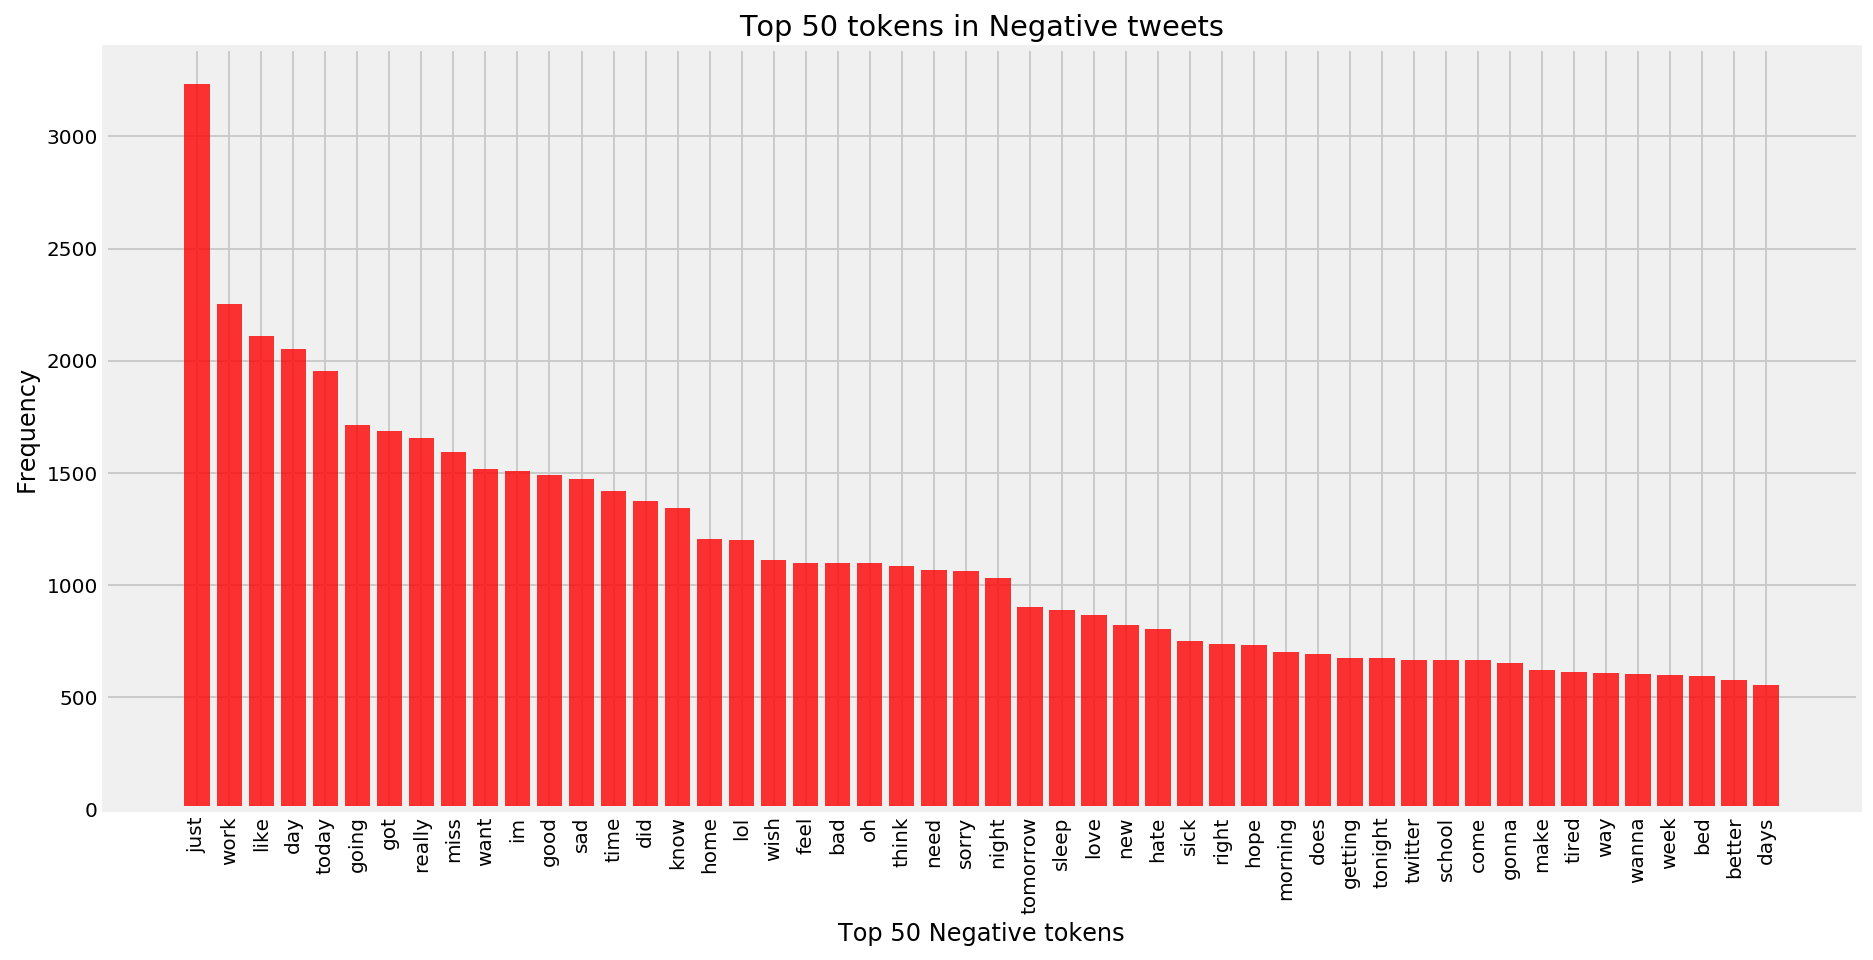

In [84]:
if WorkspaceBasedCheckPt(ChPt):
    
    TopRanksToView = 50
    Rank = np.arange(TopRanksToView)
    plt.figure(figsize=(14,7))
    DataToUse = TermFreq_DF2.sort_values(by='Negative', ascending=False)['Negative'][:TopRanksToView]
    plt.bar(Rank, DataToUse, align='center', alpha=0.8, color = 'red')
    plt.xticks(Rank, DataToUse.index,rotation='vertical')
    plt.ylabel('Frequency')
    plt.xlabel('Top {} Negative tokens'.format(TopRanksToView))
    plt.title('Top {} tokens in Negative tweets'.format(TopRanksToView))
    plt.show()

Running this cell


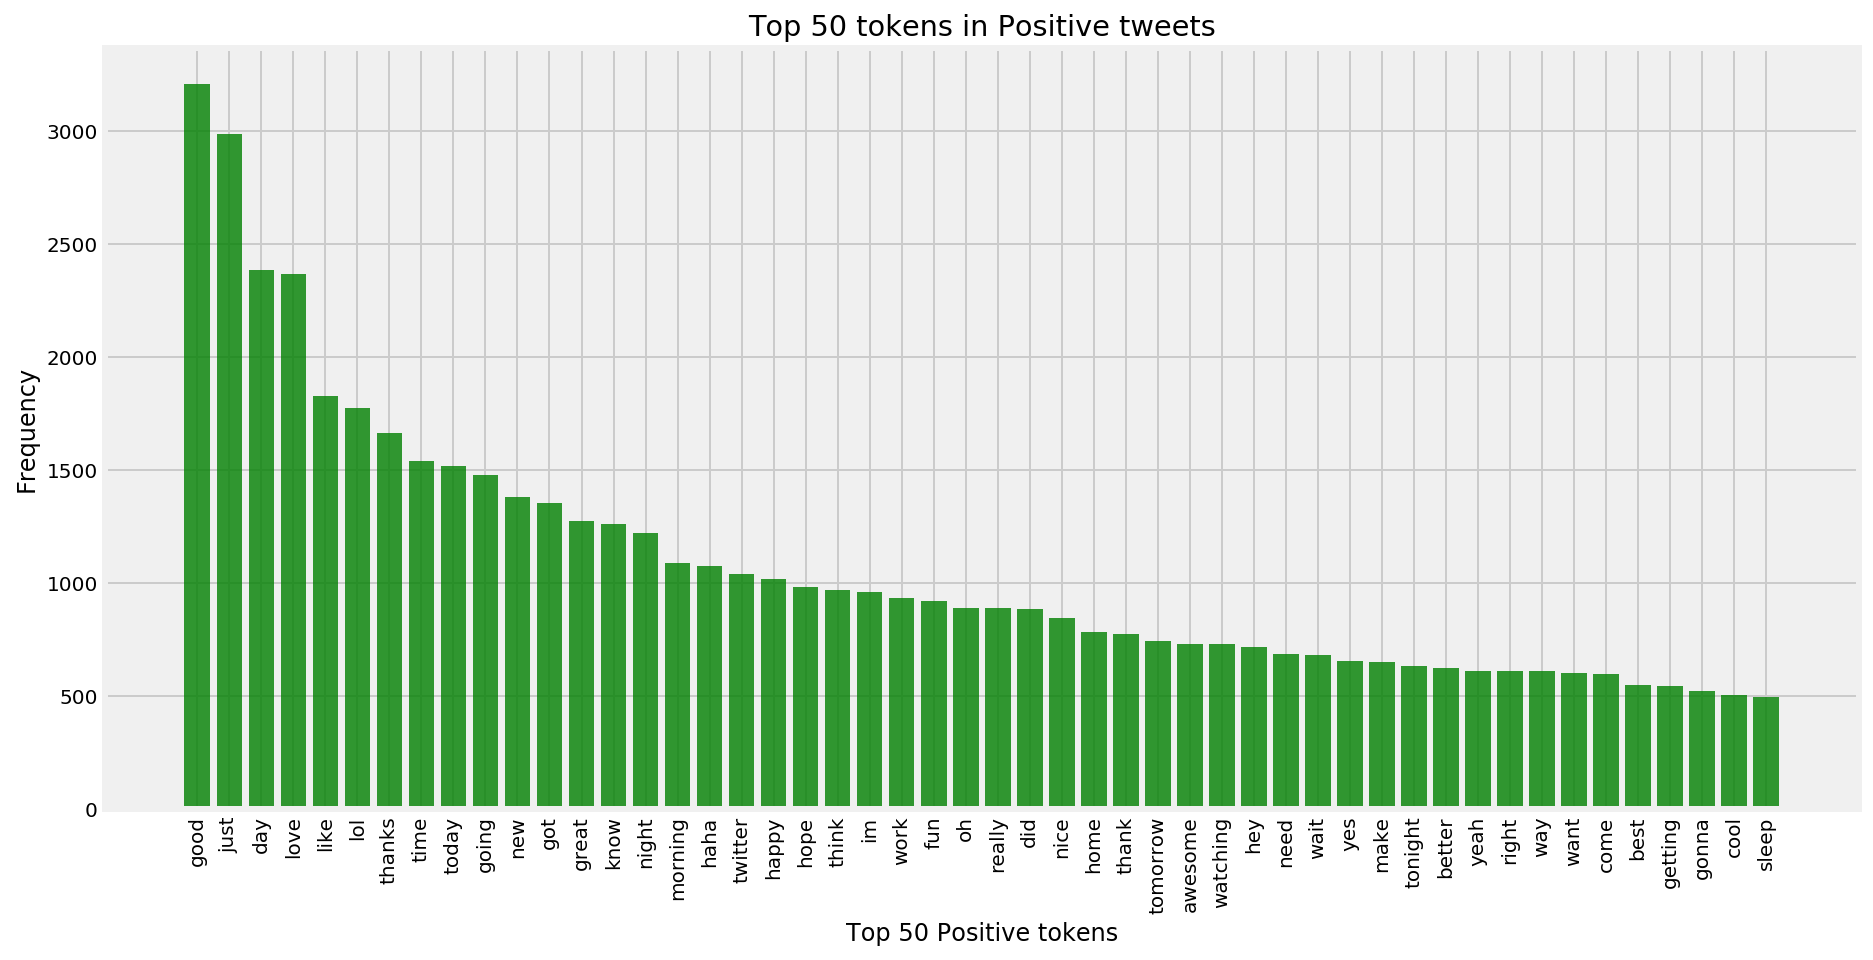

In [85]:
if WorkspaceBasedCheckPt(ChPt):
    
    TopRanksToView = 50
    Rank = np.arange(TopRanksToView)
    plt.figure(figsize=(14,7))
    DataToUse = TermFreq_DF2.sort_values(by='Positive', ascending=False)['Positive'][:TopRanksToView]
    plt.bar(Rank, DataToUse, align='center', alpha=0.8, color = 'green')
    plt.xticks(Rank, DataToUse.index,rotation='vertical')
    plt.ylabel('Frequency')
    plt.xlabel('Top {} Positive tokens'.format(TopRanksToView))
    plt.title('Top {} tokens in Positive tweets'.format(TopRanksToView))
    plt.show()

Running this cell


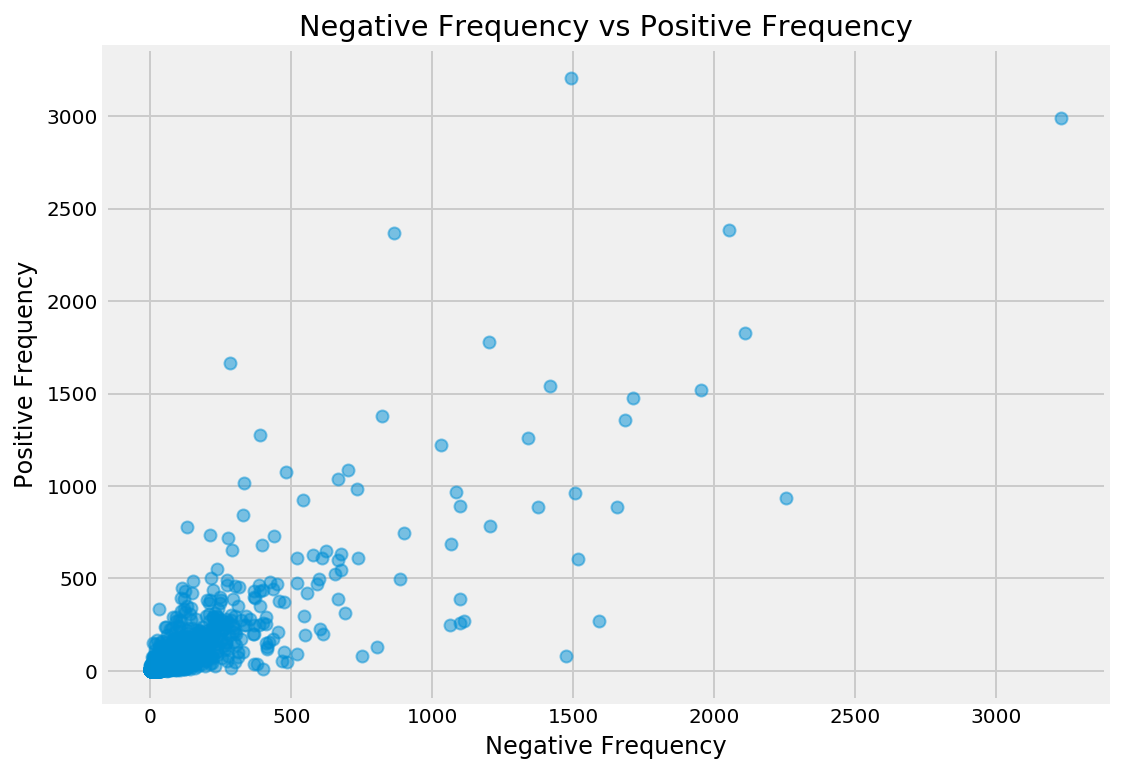

In [86]:
if WorkspaceBasedCheckPt(ChPt):
    
    import seaborn as sns
    plt.figure(figsize=(8,6))
    ax = sns.regplot(x="Negative", y="Positive",fit_reg=False, scatter_kws={'alpha':0.5}, data= TermFreq_DF2)
    plt.ylabel('Positive Frequency')
    plt.xlabel('Negative Frequency')
    plt.title('Negative Frequency vs Positive Frequency')
    plt.grid(True)
    plt.show()

In [263]:
if WorkspaceBasedCheckPt(ChPt):
    
    from bokeh.plotting import figure
    from bokeh.io import output_notebook, show
    output_notebook()

    p = figure(x_axis_label='Negative', y_axis_label='Positive', plot_width=650, plot_height=400, x_range=(0, 70000), y_range=(0, 65000))
    # p.y_range = Range1d(0, 60000)
    linexy = np.arange(max(TermFreq_DF2.Positive)*2) 
    p.line(linexy, linexy, line_width=2, color = 'black')
    p.circle(x = 'Negative',y = 'Positive', source= TermFreq_DF2.loc[TermFreq_DF2['Positive'] < TermFreq_DF2['Negative']], color = 'red', size=5, alpha=0.6)
    p.circle(x = 'Negative',y = 'Positive', source= TermFreq_DF2.loc[TermFreq_DF2['Positive'] >= TermFreq_DF2['Negative']], color = 'green', size=5, alpha=0.6)

    from bokeh.models import HoverTool
    hover = HoverTool(tooltips=[('token','@index')])
    p.add_tools(hover)
    show(p)

Running this cell


Loading BokehJS ...

Most of the words are below 10,000 on both X-axis and Y-axis, and we cannot see a meaningful relation between negative and positive frequency.

In order to come up with a meaningful metric which can characterise important tokens in each class, I borrowed a metric presented by Jason Kessler in PyData 2017 Seattle. In the talk, he presented a Python library called Scattertext. Even though I did not make use of the library, the metrics used in the Scattertext as a way of visualising text data are very useful in filtering meaningful tokens from the frequency data.

Intuitively, if a word appears more often in one class compared to another, this can be a good measure of how much the word is meaningful to characterise the class. In the below code I named it as 'pos_rate', and as you can see from the calculation of the code, this is defined as $${pos\_rate} = \frac{positive\ frequency} {positive\ frequency + negative\ frequency}$$

In [88]:
if WorkspaceBasedCheckPt(ChPt):
    
    TermFreq_DF2['PositiveRate'] = TermFreq_DF2['Positive'] * 1./TermFreq_DF2['TotalFreq']
    display(TermFreq_DF2.sort_values(by='PositiveRate', ascending=False).head(10))

Running this cell


Negative  Positive  TotalFreq  PositiveRate
zzzz                0         5          5           1.0
whichever           0         4          4           1.0
mwahaha             0         4          4           1.0
musso               0         9          9           1.0
musicmonday         0        26         26           1.0
freely              0         4          4           1.0
multitask           0         5          5           1.0
christine           0         7          7           1.0
mst                 0         4          4           1.0
amigos              0         4          4           1.0

Words with highest pos_rate have zero frequency in the negative tweets, but overall frequency of these words are too low to think of it as a guideline for positive tweets.

Another metric is the frequency a words occurs in the class. This is defined as $${pos\_freq\_pct} = \frac {positive\ frequency} {\Sigma positive\ frequency}$$

In [89]:
if WorkspaceBasedCheckPt(ChPt):
    
    TermFreq_DF2['PositiveFreq_pct'] = TermFreq_DF2['Positive'] * 1./TermFreq_DF2['Positive'].sum()
    display(TermFreq_DF2.sort_values(by='PositiveFreq_pct', ascending=False).head(10))

Running this cell


Negative  Positive  TotalFreq  PositiveRate  PositiveFreq_pct
good        1491      3207       4698      0.682631          0.014872
just        3232      2988       6220      0.480386          0.013856
day         2053      2384       4437      0.537300          0.011055
love         866      2366       3232      0.732054          0.010972
like        2111      1829       3940      0.464213          0.008481
lol         1200      1777       2977      0.596910          0.008240
thanks       281      1663       1944      0.855453          0.007712
time        1418      1540       2958      0.520622          0.007141
today       1954      1518       3472      0.437212          0.007039
going       1713      1477       3190      0.463009          0.006849



But since pos_freq_pct is just the frequency scaled over the total sum of the frequency, the rank of pos_freq_pct is exactly same as just the positive frequency.

What we can do now is to combine pos_rate, pos_freq_pct together to come up with a metric which reflects both pos_rate and pos_freq_pct. Even though both of these can take a value ranging from 0 to 1, pos_rate has much wider range actually spanning from 0 to 1, while all the pos_freq_pct values are squashed within the range smaller than 0.015. If we average these two numbers, pos_rate will be too dominant, and will not reflect both metrics effectively.

So here we use harmonic mean instead of arithmetic mean. "Since the harmonic mean of a list of numbers tends strongly toward the least elements of the list, it tends (compared to the arithmetic mean) to mitigate the impact of large outliers and aggravate the impact of small ones." The harmonic mean H of the positive real number x1,x2,...xn is defined as $${H} = \frac {n}{\sum_{i=1}^{n}\ \frac{1}{x_i}}$$


In [90]:
if WorkspaceBasedCheckPt(ChPt):
    
    from scipy.stats import hmean
    TermFreq_DF2['Positive_hmean'] = TermFreq_DF2.apply(lambda x: (hmean([x['PositiveRate'], x['PositiveFreq_pct']])
                                                                       if x['PositiveRate'] > 0 and x['PositiveFreq_pct'] > 0
                                                                       else 0), axis=1)
    display(TermFreq_DF2.sort_values(by='Positive_hmean', ascending=False).head(10))

Running this cell


Negative  Positive  TotalFreq  PositiveRate  PositiveFreq_pct  \
good        1491      3207       4698      0.682631          0.014872   
just        3232      2988       6220      0.480386          0.013856   
day         2053      2384       4437      0.537300          0.011055   
love         866      2366       3232      0.732054          0.010972   
like        2111      1829       3940      0.464213          0.008481   
lol         1200      1777       2977      0.596910          0.008240   
thanks       281      1663       1944      0.855453          0.007712   
time        1418      1540       2958      0.520622          0.007141   
today       1954      1518       3472      0.437212          0.007039   
going       1713      1477       3190      0.463009          0.006849   

        Positive_hmean  
good          0.029109  
just          0.026935  
day           0.021664  
love          0.021619  
like          0.016659  
lol           0.016256  
thanks        0.015286  
time          0.014089  
today         0.013855  
going         0.013499



The harmonic mean rank seems like the same as pos_freq_pct. By calculating the harmonic mean, the impact of small value (in this case, pos_freq_pct) is too aggravated and ended up dominating the mean value. This is again exactly same as just the frequency value rank and doesn't provide a meaningful result.

What we can try next is to get the CDF (Cumulative Distribution Function) value of both pos_rate and pos_freq_pct. **CDF can be explained as "distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x".** By calculating CDF value, we can see where the value of either pos_rate or pos_freq_pct lies in the distribution in terms of cumulative manner. In the below result of the code, we can see a word "welcome" with pos_rate_normcdf of 0.995625, and pos_freq_pct_normcdf of 0.999354. This means roughly 99.56% of the tokens will take a pos_rate value less than or equal to 0.91535, and 99.99% will take a pos_freq_pct value less than or equal to 0.001521.

Next, we calculate a harmonic mean of these two CDF values, as we did earlier. By calculating the harmonic mean, we can see that pos_normcdf_hmean metric provides a more meaningful measure of how important a word is within the class.


In [91]:
if WorkspaceBasedCheckPt(ChPt):
    
    from scipy.stats import norm
    def normcdf(x):
        return norm.cdf(x, x.mean(), x.std())

    TermFreq_DF2['PositiveRate_normcdf'] = normcdf(TermFreq_DF2['PositiveRate'])
    TermFreq_DF2['PositiveFreq_pct_normcdf'] = normcdf(TermFreq_DF2['PositiveFreq_pct'])
    TermFreq_DF2['Positive_normcdf_hmean'] = hmean([TermFreq_DF2['PositiveRate_normcdf'], TermFreq_DF2['PositiveFreq_pct_normcdf']])
    display(TermFreq_DF2.sort_values(by='Positive_normcdf_hmean', ascending=False).head(10))

Running this cell


Negative  Positive  TotalFreq  PositiveRate  PositiveFreq_pct  \
welcome          32       337        369      0.913279          0.001563   
thank           131       776        907      0.855568          0.003598   
thanks          281      1663       1944      0.855453          0.007712   
hello            51       235        286      0.821678          0.001090   
glad            112       447        559      0.799642          0.002073   
goodnight        55       238        293      0.812287          0.001104   
excited         110       396        506      0.782609          0.001836   
congrats         23       169        192      0.880208          0.000784   
enjoy            81       291        372      0.782258          0.001349   
follow          123       431        554      0.777978          0.001999   

           Positive_hmean  PositiveRate_normcdf  PositiveFreq_pct_normcdf  \
welcome          0.003120              0.970195                  0.999523   
thank            0.007167              0.947998                  1.000000   
thanks           0.015286              0.947943                  1.000000   
hello            0.002177              0.929797                  0.987304   
glad             0.004135              0.915557                  0.999996   
goodnight        0.002204              0.923972                  0.988299   
excited          0.003664              0.903142                  0.999956   
congrats         0.001566              0.958706                  0.938722   
enjoy            0.002694              0.902873                  0.997613   
follow           0.003987              0.899546                  0.999991   

           Positive_normcdf_hmean  
welcome                  0.984641  
thank                    0.973305  
thanks                   0.973276  
hello                    0.957688  
glad                     0.955915  
goodnight                0.955053  
excited                  0.949086  
congrats                 0.948609  
enjoy                    0.947882  
follow                   0.947113

In [92]:
if WorkspaceBasedCheckPt(ChPt):
    
    TermFreq_DF2['NegativeRate'] = TermFreq_DF2['Negative'] * 1./TermFreq_DF2['TotalFreq']
    TermFreq_DF2['NegativeFreq_pct'] = TermFreq_DF2['Negative'] * 1./TermFreq_DF2['Negative'].sum()
    TermFreq_DF2['Negative_hmean'] = TermFreq_DF2.apply(lambda x: (hmean([x['NegativeRate'], x['NegativeFreq_pct']])
                                                                       if x['NegativeRate'] > 0 and x['NegativeFreq_pct'] > 0 
                                                                       else 0), axis=1)                                                        
    TermFreq_DF2['NegativeRate_normcdf'] = normcdf(TermFreq_DF2['NegativeRate'])
    TermFreq_DF2['NegativeFreq_pct_normcdf'] = normcdf(TermFreq_DF2['NegativeFreq_pct'])
    TermFreq_DF2['Negative_normcdf_hmean'] = hmean([TermFreq_DF2['NegativeRate_normcdf'], TermFreq_DF2['NegativeFreq_pct_normcdf']])
    display(TermFreq_DF2.sort_values(by='Negative_normcdf_hmean', ascending=False).head(10))

Running this cell


Negative  Positive  TotalFreq  PositiveRate  PositiveFreq_pct  \
hurts          401        12        413      0.029056          0.000056   
sad           1473        82       1555      0.052733          0.000380   
headache       285        17        302      0.056291          0.000079   
sucks          484        46        530      0.086792          0.000213   
poor           367        36        403      0.089330          0.000167   
missing        378        38        416      0.091346          0.000176   
sick           751        80        831      0.096270          0.000371   
ugh            466        52        518      0.100386          0.000241   
hate           805       131        936      0.139957          0.000607   
miss          1592       269       1861      0.144546          0.001247   

          Positive_hmean  PositiveRate_normcdf  PositiveFreq_pct_normcdf  \
hurts           0.000111              0.019310                  0.460103   
sad             0.000755              0.024859                  0.736619   
headache        0.000157              0.025799                  0.480935   
sucks           0.000426              0.035135                  0.600993   
poor            0.000333              0.036024                  0.560085   
missing         0.000352              0.036742                  0.568333   
sick            0.000739              0.038547                  0.729735   
ugh             0.000481              0.040110                  0.625045   
hate            0.001210              0.057911                  0.874134   
miss            0.002473              0.060326                  0.995222   

          Positive_normcdf_hmean  NegativeRate  NegativeFreq_pct  \
hurts                   0.037065      0.970944          0.001740   
sad                     0.048095      0.947267          0.006391   
headache                0.048970      0.943709          0.001237   
sucks                   0.066390      0.913208          0.002100   
poor                    0.067693      0.910670          0.001592   
missing                 0.069022      0.908654          0.001640   
sick                    0.073226      0.903730          0.003258   
ugh                     0.075383      0.899614          0.002022   
hate                    0.108626      0.860043          0.003493   
miss                    0.113757      0.855454          0.006907   

          Negative_hmean  NegativeRate_normcdf  NegativeFreq_pct_normcdf  \
hurts           0.003473              0.980690                  0.999949   
sad             0.012696              0.975141                  1.000000   
headache        0.002470              0.974201                  0.996451   
sucks           0.004190              0.964865                  0.999999   
poor            0.003179              0.963976                  0.999796   
missing         0.003274              0.963258                  0.999868   
sick            0.006493              0.961453                  1.000000   
ugh             0.004035              0.959890                  0.999997   
hate            0.006957              0.942089                  1.000000   
miss            0.013704              0.939674                  1.000000   

          Negative_normcdf_hmean  
hurts                   0.990226  
sad                     0.987414  
headache                0.985201  
sucks                   0.982118  
poor                    0.981560  
missing                 0.981221  
sick                    0.980348  
ugh                     0.979533  
hate                    0.970181  
miss                    0.968899

Running this cell


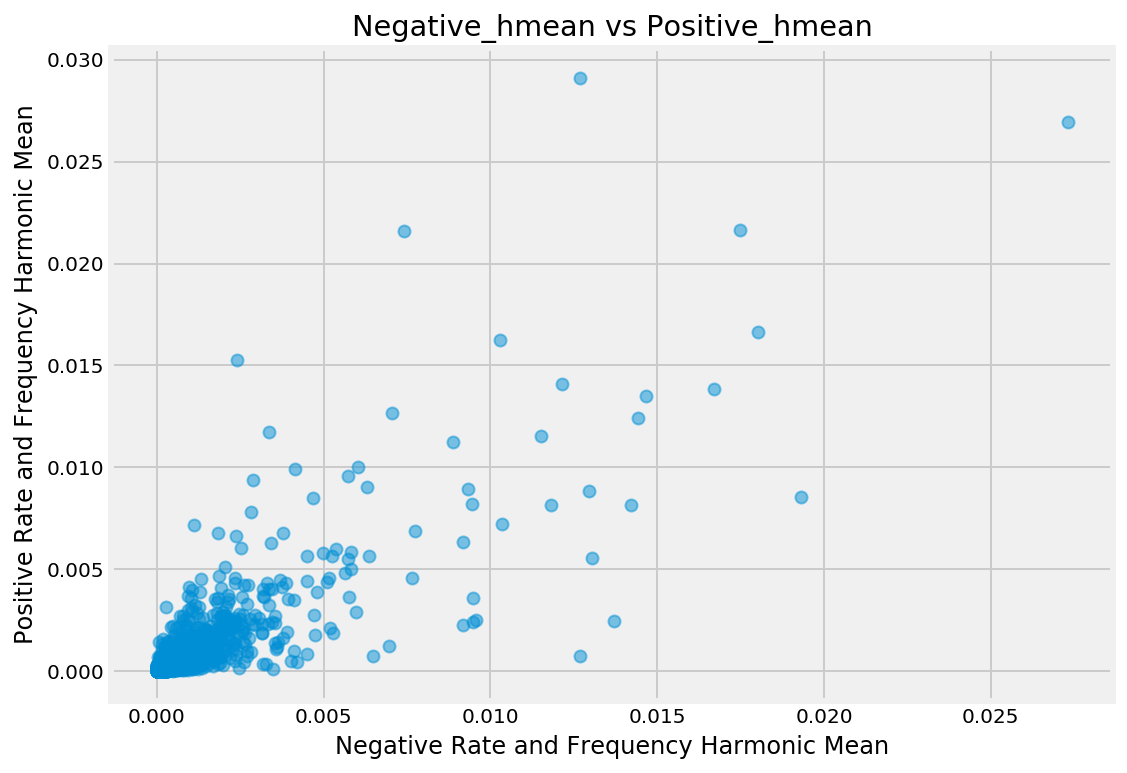

In [93]:
if WorkspaceBasedCheckPt(ChPt):
    
    plt.figure(figsize=(8,6))
    ax = sns.regplot(x="Negative_hmean", y="Positive_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=TermFreq_DF2)
    plt.ylabel('Positive Rate and Frequency Harmonic Mean')
    plt.xlabel('Negative Rate and Frequency Harmonic Mean')
    plt.title('Negative_hmean vs Positive_hmean')

In [94]:
if WorkspaceBasedCheckPt(ChPt):
    
    from bokeh.plotting import figure
    from bokeh.io import output_notebook, show
    output_notebook()

    p = figure(x_axis_label='Negative Rate and Frequency Harmonic Mean', y_axis_label='Positive Rate and Frequency Harmonic Mean', plot_width=650, plot_height=400, x_range=(0, 0.03), y_range=(0, 0.03))
    
    p.line([0,1], [0,1], line_width=2, color = 'black')
    p.circle(x = 'Negative_hmean',y = 'Positive_hmean', source= TermFreq_DF2.loc[TermFreq_DF2['Positive_hmean'] < TermFreq_DF2['Negative_hmean']], color = 'red', size=5, alpha=0.6)
    p.circle(x = 'Negative_hmean',y = 'Positive_hmean', source= TermFreq_DF2.loc[TermFreq_DF2['Positive_hmean'] >= TermFreq_DF2['Negative_hmean']], color = 'green', size=5, alpha=0.6)

    from bokeh.models import HoverTool
    hover = HoverTool(tooltips=[('token','@index')])
    p.add_tools(hover)
    show(p)
    # from bokeh.plotting import figure
    # from bokeh.io import output_notebook, show
    # from bokeh.models import LinearColorMapper
    # output_notebook()
    # color_mapper = LinearColorMapper(palette='Inferno256', low= min(TermFreq_DF2.Positive_hmean), high=max(TermFreq_DF2.Positive_hmean))
    # p = figure(x_axis_label='Negative_hmean', y_axis_label='Positive_hmean')
    # p.circle('Negative_hmean','Positive_hmean',size=5,alpha=0.3,source= TermFreq_DF2, color={'field': 'Positive_hmean', 'transform': color_mapper})
    # from bokeh.models import HoverTool
    # hover = HoverTool(tooltips=[('token','@index')])
    # p.add_tools(hover)
    # show(p)

Running this cell


Loading BokehJS ...

Running this cell


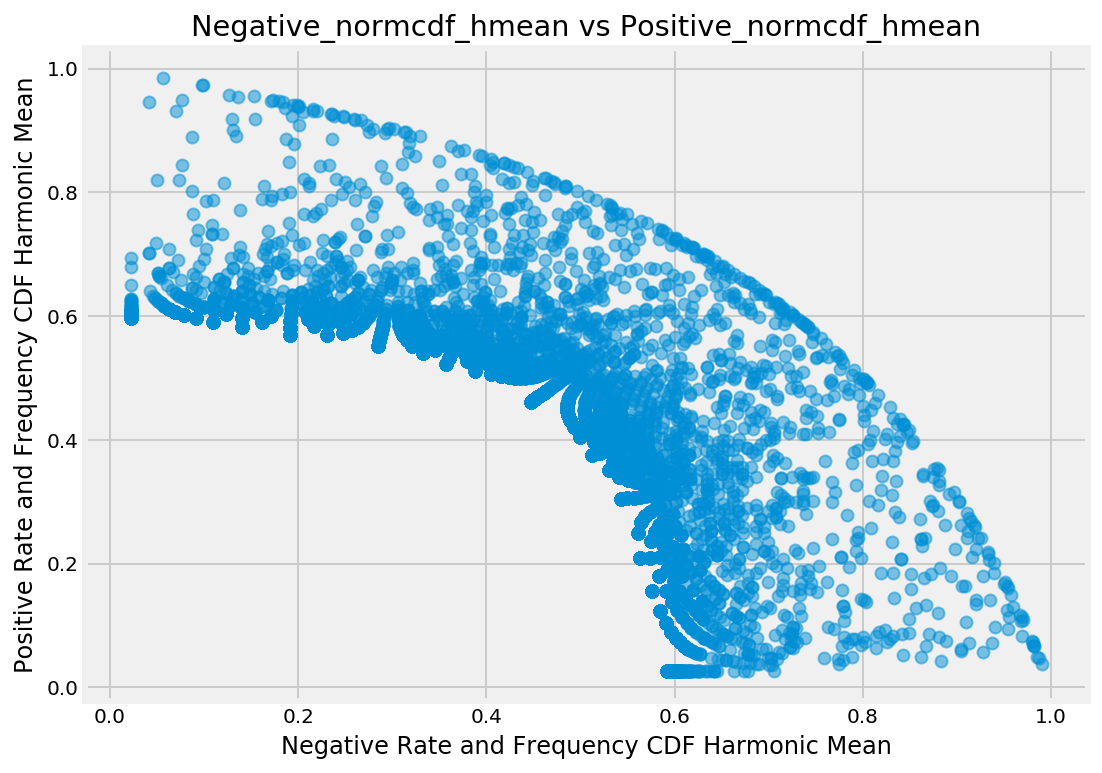

In [95]:
if WorkspaceBasedCheckPt(ChPt):
    
    plt.figure(figsize=(8,6))
    ax = sns.regplot(x="Negative_normcdf_hmean", y="Positive_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=TermFreq_DF2)
    plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
    plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
    plt.title('Negative_normcdf_hmean vs Positive_normcdf_hmean')

It seems like the harmonic mean of rate CDF and frequency CDF has created an interesting pattern on the plot. If a data point is near to upper left corner, it is more positive, and if it is closer to the bottom right corner, it is more negative.

It is good that the metric has created some meaningful insight out of frequency, but with text data, showing every token as just a dot is lacking important information on which token each data point represents. With 10,000 points, it is difficult to annotate all of the points on the plot. For this part, I have tried several methods and came to a conclusion that it is not very practical or feasible to directly annotate data points on the plot.

So I took an alternative method of the interactive plot with Bokeh. Bokeh is an interactive visualisation library for Python, which creates graphics in style of D3.js. Bokeh can output the result in HTML format or also within the Jupyter Notebook. And below is the plot created with Bokeh.

In [96]:
if WorkspaceBasedCheckPt(ChPt):
    
    from bokeh.plotting import figure
    from bokeh.io import output_notebook, show
    from bokeh.models import LinearColorMapper
    output_notebook()
    color_mapper = LinearColorMapper(palette='Inferno256', low= min(TermFreq_DF2.Positive_normcdf_hmean), high=max(TermFreq_DF2.Positive_normcdf_hmean))
    p = figure(x_axis_label='Negative_normcdf_hmean', y_axis_label='Positive_normcdf_hmean')
    p.line([0,1], [0,1], line_width=2, color = 'black')
    p.circle('Negative_normcdf_hmean','Positive_normcdf_hmean',size=5,alpha=0.6,source= TermFreq_DF2,color={'field': 'Positive_normcdf_hmean', 'transform': color_mapper})
    from bokeh.models import HoverTool
    hover = HoverTool(tooltips=[('token','@index')])
    p.add_tools(hover)
    show(p)

Running this cell


Loading BokehJS ...



With above Bokeh plot, you can see what token each data point represents by hovering over the points. For example, the points in the top left corner show tokens like "thank", "welcome", "congrats", etc. And some of the tokens in bottom right corner are "sad", "hurts", "died", "sore", etc. And the colour of each dot is organised in "Inferno256" colour map in Python, so yellow is the most positive, while black is the most negative, and the colour gradually goes from black to purple to orange to yellow, as it goes from negative to positive.

Depending on which model I will use later for classification of positive and negative tweets, this metric can also come in handy.


<h2><img src="http://sierraexpressmedia.com/wp-content/uploads/2016/01/checkpoint.png" alt="roundtoc" style="float:left;width:60px;height:60px;"><b>&emsp;Checkpoint 4 Reached</b><a class="anchor" id="check4"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;[Checkpoint_Head](#checkpoints)

In [97]:
if WorkspaceBasedCheckPt(ChPt):
    var = %who_ls
    ThingsToKeep = ['glob', 'dill', 'np', 'os', 'pd', 'plt', 'sns', 'time', 'WorkspaceBasedCheckPt', 'config', 'ChPt', 'TermFreq_DF', 'TermFreq_DF2', 'test_DF', 'train_DF']
    print("Things that can be removed from workspace")
    print(", ".join([i for i in var if i not in ThingsToKeep]))

Running this cell
CntVec, CountVectorizer, DataToUse, HoverTool, In, LinearColorMapper, Negative, NegativeDoc_matrix, Negative_tf, Out, Positive, PositiveDoc_matrix, Positive_tf, Rank, ThingsToKeep, TopRanksToView, ax, color, color_mapper, figure, hmean, hover, linexy, norm, normcdf, output_notebook, p, show, sys


In [98]:
if WorkspaceBasedCheckPt(ChPt):
    del(CntVec, CountVectorizer, DataToUse, HoverTool, In, LinearColorMapper, Negative, NegativeDoc_matrix, Negative_tf, Out, Positive, PositiveDoc_matrix, Positive_tf, Rank, ThingsToKeep, TopRanksToView, ax, color, color_mapper, figure, hmean, hover, linexy, norm, normcdf, output_notebook, p, show, sys)

Running this cell


In [ ]:
WorkspaceBasedCheckPt(ChPt, True)
ChPt = 5

In [100]:
## https://github.com/uqfoundation/dill/issues/155
## https://github.com/uqfoundation/dill/issues/79
## dill.dump

# dill.detect.trace(True)
# try:
# #     WorkspaceBasedCheckPt(2, True)
#     WorkspaceBasedCheckPt(2, True, {'access': True, 'task':'load'})
# except:
#     print(e.message)


# %who, %reset_selective regex, %tb, %who_ls
# print("As after checkpoint 2 we haven't transformed data in anyway hence maintaining this new workspace will be a waste of memory. To have just the essential data we are gonna reset our environment and gonna load checkpoint2 workspace.")
# %reset
# WorkspaceBasedCheckPt(2, True, {'access':True, 'task': 'load'})

In [105]:
%whos

Variable                Type         Data/Info
----------------------------------------------
ChPt                    int          5
TermFreq_DF             DataFrame                      Negativ<...>n[44860 rows x 3 columns]
TermFreq_DF2            DataFrame                Negative  Pos<...>[10000 rows x 15 columns]
WorkspaceBasedCheckPt   function     <function WorkspaceBasedC<...>heckPt at 0x7faf2fb75730>
config                  dict         n=7
dill                    module       <module 'dill' from '/usr<...>ckages/dill/__init__.py'>
glob                    module       <module 'glob' from '/usr/lib/python3.5/glob.py'>
np                      module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
os                      module       <module 'os' from '/usr/lib/python3.5/os.py'>
pd                      module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt                     module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns  

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;6.  Model Development</b><a class="anchor" id="H6"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;**To classsify text as Positive or Negative** 
  
### 6.1. Dataset Split
Before we can train any model, we first consider how to split the data. Here I chose to split the data into three chunks: train, development, test. I referenced Andrew Ng's "deeplearning.ai" course on how to split the data.

    Train set: The sample of data used for learning
    Development set (Hold-out cross-validation set): The sample of data used to tune the parameters of a classifier, and provide an unbiased evaluation of a model.
    Test set: The sample of data used only to assess the performance of a final model.

The ratio I decided to split my data is 98/1/1, 98% of data as the training set, and 1% for the dev set, and the final 1% for the test set. The rationale behind this ratio comes from the size of my whole data set. The dataset has more than 1.5 million entries. In this case, only 1% of the whole data gives me more than 15,000 entries. This is more than enough to evaluate the model and refine the parameters.

Another approach is splitting the data into only train and test set, and run k-fold cross-validation on the training set, so that you can have an unbiased evaluation of a model. But considering the size of the data, I have decided to use the train set only to train a model, and evaluate on the dev set, so that I can quickly test different algorithms and run this process iteratively.
 

In [107]:
if WorkspaceBasedCheckPt(ChPt):
    display(train_DF.head())

sentiment_class                                               text  \
0                0  @mileycyrus MILEY YOU'RE NOT COMING TO PHILLY/...   
1                0  Lots to do today but I'm so exhausted I don't ...   
2                0  it sucks to have your car low on freon in flor...   
3                0  Got injured in the process at 16k mark. Wasted...   
4                0  @BonjourVous yeah I know  ... sometimes I feel...   

   pre_clean_len_text                                         clean_text  \
0                 135  miley you are not coming to philly atlantic ci...   
1                  68  lots to do today but i am so exhausted i do no...   
2                  51  it sucks to have your car low on freon in florida   
3                  83  got injured in the process at mark wasted good...   
4                  77  yeah i know sometimes i feel like the world it...   

   clean_len_text  
0             115  
1              68  
2              49  
3              75  
4              59

In [108]:
if WorkspaceBasedCheckPt(ChPt):
    
    from sklearn.model_selection import train_test_split

    Quant = [int(elem) for elem in config['Train:Val:TestSplit'].split(':')]
    TrainSiz = Quant[0]/(Quant[0]+Quant[1]+Quant[2])

    TrainDF, TempDF = train_test_split(train_DF, test_size = 1-TrainSiz)
    x_TrainDF = TrainDF['clean_text']
    y_TrainDF = TrainDF['sentiment_class']
    print('Trainset Shape:', TrainDF.shape)
    del(TrainSiz)

    ValSiz = Quant[1]/(Quant[1]+Quant[2])
    ## Adding some more observation from test set to the val and test set
    TempDF = TempDF.append(test_DF, ignore_index=True).sample(frac=1).reset_index(drop=True)
    ValDF, TestDF = train_test_split(TempDF, test_size = 1-ValSiz)

    print('Validationset Shape:', ValDF.shape)
    print('Testset Shape:', TestDF.shape)
    x_ValDF = ValDF['clean_text']
    y_ValDF = ValDF['sentiment_class']
    x_TestDF = TestDF['clean_text']
    y_TestDF = TestDF['sentiment_class']
    del(Quant, ValSiz, ValDF, TempDF)
    
    print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_TrainDF), (len(x_TrainDF[y_TrainDF == 0]) / (len(x_TrainDF)*1.))*100, (len(x_TrainDF[y_TrainDF == 1]) / (len(x_TrainDF)*1.))*100))
    print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_ValDF), (len(x_ValDF[y_ValDF == 0]) / (len(x_ValDF)*1.))*100, (len(x_ValDF[y_ValDF == 1]) / (len(x_ValDF)*1.))*100))
    print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_TestDF), (len(x_TestDF[y_TestDF == 0]) / (len(x_TestDF)*1.))*100, (len(x_TestDF[y_TestDF == 1]) / (len(x_TestDF)*1.))*100))

Trainset Shape: (78399, 5)
Validationset Shape: (980, 5)
Testset Shape: (980, 5)
Train set has total 78399 entries with 50.43% negative, 49.57% positive
Validation set has total 980 entries with 51.73% negative, 48.27% positive
Test set has total 980 entries with 46.53% negative, 53.47% positive


In [109]:
if WorkspaceBasedCheckPt(ChPt):
    x_TrainDF.head()

47117    hey and whats the weather like in pismo slo ar...
8380           gah the has turned into mile long mph conga
2303     phone is still broke pretty sure im calling in...
299      worst job yet but potentially great haha hope ...
32905               wishing we could get our kitty already
Name: clean_text, dtype: object

### 6.2. Baseline Accuracy

When comparing various machine learning algorithms, baseline provides a point of reference to compare. The most popular baseline is the Zero Rule (ZeroR). ZeroR classifier simply predicts the majority category (class). Although there is no predictability power in ZeroR, it is useful for determining a baseline performance as a benchmark for other classification methods. As you can see from the above validation set class division, the majority class is negative with 50.40%, which means if a classifier predicts negative for every validation data, it will get 50.40% accuracy.

Another baseline I wanted to compare the validation results with is TextBlob. **Textblob is a python library for processing textual data. Apart from other useful tools such as POS tagging, n-gram, The package has built-in sentiment classification. This is a so-called out-of-the-box sentiment analysis tool**, and in addition to the null accuracy, I will also keep in mind of the accuracy I get from TextBlob sentiment analysis to see how my model is performing.


In [110]:
if WorkspaceBasedCheckPt(ChPt):
    
    from textblob import TextBlob
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report, confusion_matrix
    import matplotlib.patches as patches

In [111]:
if WorkspaceBasedCheckPt(ChPt):
    
    %%time
    TB_Result = [TextBlob(i).sentiment.polarity for i in x_ValDF]
    TB_Predict = [0 if n < 0 else 1 for n in TB_Result]

CPU times: user 668 ms, sys: 0 ns, total: 668 ms
Wall time: 668 ms


In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    def Plot_Confusion_Matrix(y_act, y_pred):
    
        print(classification_report(y_ValDF, TB_Predict))
        
        tn, fp, fn, tp = confusion_matrix(y_act, y_pred).ravel()
        
        PCP = tp + fp # Predicted Condition Positive
        PCN = fn + tn # Predicted Condition Negative
        TCP = tp + fn # True Condition Positive
        TCN = fp + tn # True Condition Negative
        
        TotPop = tp + fp + fn + tn # Total Population
        
        accuracy = (tp + tn) / TotPop
        Prevalence = (tp + fn) / TotPop  # TCP/TotPop
        Precision = tp / PCP #tp/(fp + tp)
        FalseDiscoveryRate = fp / PCP #fp/(fp + tp)
        FalseOmissionRate = fn / PCN #fn/(tn + fn)
        NegativePredictiveValue = tn / PCN #tn/(tn + fn)
        
        TruePositiveRate = tp / TCP
        FalsePositiveRate = fp / TCN
        PositiveLikelihoodRatio = TruePositiveRate / FalsePositiveRate
        FalseNegativeRate = fn / TCP
        TrueNegativeRate = tn / TCN
        NegativeLikelihoodRatio = FalseNegativeRatio / TrueNegativeRate
        
        DiagnosticOddsRatio = PositiveLikelihoodRatio / NegativeLikelihoodRatio
        F1Score = (2*tp) / (2*tp + fp + fn)
        
        MattheawCorrelationCoefficient = (tp*tn - fp*fn) / ((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2)

        fig = plt.figure(figsize=(15,8))
        ax  = fig.add_subplot(111)
        # ax.imshow(df, interpolation='nearest', cmap=plt.cm.gray)

        # Draw the grid boxes
        ax.set_xlim(-0.5,2.5)
        ax.set_ylim(2.5,-0.5)

        #ax.plot([x1,x2],[y1,y2], '-k', lw=2)
        ## HorizontalLines
        ax.plot([ 0.5,1.5],[-0.5,-0.5], '-k', lw=4) ## border
        ax.plot([ 0.0,2.5],[0.0,0.0], '-k', lw=2)
        ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
        ax.plot([ 0.0,2.5],[1.0,1.0], '-k', lw=2)
        ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
        ax.plot([ 0.5,2.0],[2.0,2.0], '-k', lw=2)
        ax.plot([ 0.5,2.5],[2.5,2.5], '-k', lw=4) ## border
        ## Vertical Line
        ax.plot([-0.5,-0.5], [0.5,1.5], '-k', lw=4) ## border
        ax.plot([0.0,0.0], [ 0.0,1.5], '-k', lw=2)
        ax.plot([0.5,0.5], [-0.5,2.5], '-k', lw=2)
        ax.plot([1.0,1.0], [ 0.0,2.5], '-k', lw=2)
        ax.plot([1.5,1.5], [-0.5,2.5], '-k', lw=2)
        ax.plot([2.0,2.0], [ 0.0,2.5], '-k', lw=2)
        ax.plot([2.5,2.5], [ 0.0,2.5], '-k', lw=4) ## border
        
        ### Creating a box
        ax.plot([0.5,1.5], [0.5,0.5], '-k', lw=4) ##Horiz line
        ax.plot([0.5,1.5], [1.5,1.5], '-k', lw=4) ##Horiz line
        ax.plot([0.5,0.5], [0.5,1.5], '-k', lw=4) ##Vert line
        ax.plot([1.5,1.5], [0.5,1.5], '-k', lw=4) ##Vert line
        
        ax.set_facecolor("w")
        
        
        ## Setting Headings
        ax.text(1.0, -0.25, s = 'True Condition', fontsize=18, color = 'w',  va='center', ha='center', bbox=dict(fc='w', alpha=0,boxstyle='round,pad=1'))
        ax.text(-0.25, 1.0, s = 'Predicted\nCondition', fontsize=18, color = 'w', va='center', ha='center', bbox=dict(fc='w', alpha=0,boxstyle='round,pad=1'))
        ax.text(0.25, 0.75, s = 'Condition\nPositive', fontsize=18, color = 'k', va='center', ha='center', bbox=dict(fc='w', alpha=0,boxstyle='round,pad=1'))
        ax.text(0.25, 1.25, s = 'Condition\nNegative', fontsize=18, color = 'k', va='center', ha='center', bbox=dict(fc='w', alpha=0,boxstyle='round,pad=1'))
        ax.text(0.75, 0.25, s = 'Condition\nPositive', fontsize=18, color = 'k', va='center', ha='center', bbox=dict(fc='k', alpha=0, boxstyle='round,pad=1'))
        ax.text(1.25, 0.25, s = 'Condition\nNegative', fontsize=18, color = 'k', va='center', ha='center', bbox=dict(fc='w', alpha=0,boxstyle='round,pad=1'))
        ## Values box
        ax.text(0.75,0.75, 'True Pos: {}'.format(round(tp,0)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0,boxstyle='round,pad=1'))
        ax.text(1.25,0.75, 'False Pos: {}\nType I error'.format(round(fp,0)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0,boxstyle='round,pad=1'))
        ax.text(0.75,1.25, 'False Neg: {}\nType II error'.format(round(fn,0)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0,boxstyle='round,pad=1'))
        ax.text(1.25,1.25, 'True Neg: {}'.format(round(tn,0)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0,boxstyle='round,pad=1'))

        ax.text(1.75,0.25, 'Prevalence: {}'.format(round(Prevalence,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))
        ax.text(2.25,0.25, 'Accuracy: {}'.format(round(accuracy,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))

        ax.text(1.75,0.75, 'Pos Pred Val,\n Precision: {}'.format(round(Precision,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))
        ax.text(2.25,0.75, 'False Discovery Rate,\n FDR: {}'.format(round(FalseDiscoveryRate,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))
        ax.text(1.75,1.25, 'False Omission Rate,\n FOR: {}'.format(round(FalseOmissionRate,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))
        ax.text(2.25,1.25, 'Neg Pred Value,\n NDV: {}'.format(round(NegativePredictiveValue,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))

        ax.text(0.75,1.75, 'True Pos Rate,\n TPR: {}'.format(round(TruePositiveRate,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))
        ax.text(0.75,2.25, 'Falsse Pos Rate,\n FPR: {}'.format(round(FalsePositiveRate,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))
        ax.text(1.25,1.75, 'False Neg Rate,\n FNR: {}'.format(round(FalseNegativeRate,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))
        ax.text(1.25,2.25, 'True Neg Rate,\n TNR: {}'.format(round(TrueNegativeRate,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))

        ax.text(1.75,1.75, 'Pos Likelihood Ratio,\n LR+: {}'.format(round(PositiveLikelihoodRatio,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))
        ax.text(1.75,2.25, 'Neg Likelihood Ratio,\n LR-: {}'.format(round(NegativeLikelihoodRatio,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))
        ax.text(2.25,1.75, 'Diag Odds Rat,\n DOR: {}'.format(round(DiagnosticOddsRatio,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))
        ax.text(2.25,2.25, 'F1 Score: {}'.format(round(F1Score,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))
        # ax.text(1.75,0.75, 'PPV,\n Precision: {}'.format(round(xxx,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))

        ax.text(0.25,0.25, 'Matthews Corr Coeff,\n MCC: {}'.format(round(MattheawCorrelationCoefficient,3)), fontsize=13, va='center', ha='center', bbox=dict(fc='w', alpha=0, boxstyle='round,pad=1'))
        # ax.bbox([[0.08, 0.125], [0.95, 0.88]], facecolor='0.2', alpha=0.5)
        ax.add_patch( patches.Rectangle( (0.5, -0.5), 1.0, 0.5, facecolor='k', alpha=1.0) )
        ax.add_patch( patches.Rectangle( (-0.5, 0.5), 0.5, 1.0, facecolor='k', alpha=1.0) )
        ax.add_patch( patches.Rectangle( (0.5, 0.0), 0.5, 0.5, facecolor='b', alpha=0.7) )
        ax.add_patch( patches.Rectangle( (1.0, 0.0), 0.5, 0.5, facecolor='orange', alpha=0.7) )
        ax.add_patch( patches.Rectangle( (0.0, 0.5), 0.5, 0.5, facecolor='b', alpha=0.7) )
        ax.add_patch( patches.Rectangle( (0.0, 1.0), 0.5, 0.5, facecolor='orange', alpha=0.7) )
        # ax.add_patch( patches.Rectangle( (0.5, -0.5), 0.5, 1.0, facecolor='0.2', alpha=0.5) )
        # ax.axhspan(1, 2.25)
        ax.axis('off')


        ### Creating a box for other measure
        ax.plot([-0.45, 0.45], [1.6,1.6], '-k', lw=2) ##Horiz line
        ax.plot([-0.45, 0.45], [2.4,2.4], '-k', lw=2) ##Horiz line
        ax.plot([-0.45,-0.45], [1.6,2.4], '-k', lw=2) ##Vert line
        ax.plot([ 0.45, 0.45], [1.6,2.4], '-k', lw=2) ##Vert line
    #     https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axes.html
    #     https://matplotlib.org/gallery/subplots_axes_and_figures/axes_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axes-demo-py

        from sklearn.metrics import roc_curve
        a = plt.axes([.09, .149, .27, .21], facecolor='lightgrey')
        fpr, tpr, thresholds = roc_curve(y_TestDF, y_pred)
        plt.plot(fpr, tpr)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
    #     plt.xlim(0,1)
    #     plt.ylim(0,1)
        plt.axis([0, 1, 0, 1])
        plt.axhline(linewidth=3, color="k")
        plt.axvline(linewidth=3, color="k")

Plot_Confusion_Matrix(y_ValDF, TB_Predict)

In [ ]:
# ConfMat = np.array(confusion_matrix(y_ValDF, TB_Predict, labels=[1,0]))

# confusion = pd.DataFrame(ConfMat, index=['positive', 'negative'],
#                          columns=['predicted_positive','predicted_negative'])
# print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_ValDF, TB_Predict)*100))
# print("-"*80)
# print("Confusion Matrix\n")
# print(confusion)
# print("-"*80)
# print("Classification Report\n")
# print(classification_report(y_ValDF, TB_Predict))

## 6.3. Parameter Tuning


### Feature Extraction

If we want to use text in machine learning algorithms, we’ll have to **convert them to a numerical representation**. One of the methods is called bag-of-words approach. The bag of words model ignores grammar and order of words. Once we have a corpus (text data) then first, a list of vocabulary is created based on the entire corpus. Then each document or data entry is represented as numerical vectors based on the vocabulary built from the corpus.

### Count Vectorizer

With count vectorizer, we merely count the appearance of the words in each text. For example, let's say we have 3 documents in a corpus: "I love dogs", "I hate dogs and knitting", "Knitting is my hobby and my passion". If we build vocabulary from these three sentences and represent each document as count vectors, it will look like below pictures.

**title**

But if the size of the corpus gets big, the number of vocabulary gets too big to process. With my 1.5 million tweets, if I build vocabulary without limiting the number of vocabulary, I will have more than 260,000 vocabularies. This means that the shape of training data will be around 1,500,000 x 260,000, this sounds too big to train various different models with. So I decided to limit the number of vocabularies, but I also wanted to see how the performance varies depending on the number of vocabularies.

Another thing I wanted to explore is stopwords. Stop Words are words which do not contain important significance, such as "the", "of", etc. It is often assumed that removing stopwords is a necessary step, and will improve the model performance. But I wanted to see for myself if this is really the case. So I ran the same test with and without stop words and compared the result. In addition, I also defined my custom stopwords list, which contains top 10 most frequent words in the corpus: "to", "the", "my", "it", "and", "you", "not", "is", "in", "for".

A model I chose to evaluate different count vectors is the logistic regression. It is one of the linear models, so computationally scalable to big data, compared to models like KNN or random forest. And once I have the optimal number of features and make a decision on whether to remove stop words or not, then I will try different models with the chosen number of vocabularies' count vectors.


In [620]:
if WorkspaceBasedCheckPt(ChPt):
    
    ## Importing Packages related to Vectorizer
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.feature_extraction.text import HashingVectorizer

    ## Importing Packages related to Classifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import LinearSVC
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from sklearn.naive_bayes import MultinomialNB, BernoulliNB
    from sklearn.linear_model import RidgeClassifier
    from sklearn.linear_model import PassiveAggressiveClassifier
    from sklearn.linear_model import Perceptron
    from sklearn.neighbors import NearestCentroid
    from xgboost import XGBClassifier

    ## Importing Other Packages
    from sklearn.model_selection import GridSearchCV
    from sklearn.feature_selection import SelectFromModel
    from sklearn.pipeline import Pipeline
    from time import time

    Cnt_Vec = CountVectorizer()
    TfIdf_Vec = TfidfVectorizer()
    Hsh_Vec = HashingVectorizer()

    lr = LogisticRegression()
    LSVC = LinearSVC()
    MNB = MultinomialNB()
    RC = RidgeClassifier()
    PAC = PassiveAggressiveClassifier()

    LogReg = LogisticRegression(),
    LinSVC = LinearSVC(),
    LinSVC_l1FeaSel = Pipeline([ ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))), ('classification', LinearSVC(penalty="l2"))])
    MultiNB = MultinomialNB(),
    BernNB = BernoulliNB(),
    RidCla = RidgeClassifier(),
    AdBooCla = AdaBoostClassifier(),
    Perce = Perceptron(),
    PassAggCla = PassiveAggressiveClassifier(),
    NeaCent = NearestCentroid()

    XGB_Cla = XGBClassifier()

By looking at the evaluation result, removing stop words did not improve the model performance, but keeping the stop words yielded better performance. I wouldn't say that removing stopwords are not helping the model performance every time, but as empirical findings, in this particular setting, keeping the stop words improve the model performance.

### Bigram
According to Wikipedia, "n-gram is a contiguous sequence of n items from a given sequence of text or speech". In other words, n-grams are simply all combinations of adjacent words or letters of length n that you can find in your source text. Below picture represents well how n-grams are constructed out of source text.

![](https://i.stack.imgur.com/8ARA1.png)

![](https://i.stack.imgur.com/ysM0Z.png)
![](https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png)
![](https://classeval.files.wordpress.com/2015/06/error-rate.png?w=440&h=155)


In this project, I will extend the bag-of-words to trigrams, and see if it affects the performance.

Now let's visualise the results we got from unigram, bigram, and trigram.



The best validation set accuracy for each n-gram is as below.

    unigram: 80,000 & 90,000 features at validation accuracy 80.28%
    bigram: 70,000 features at validation accuracy 82.25%
    trigram: 80,000 features at validation accuracy 82.44%

Below I defined another function to take a closer look at best performing number of features with each n-gram. Below function not only reports accuracy but also gives confusion matrix and classification report.



## TFIDF Vectorizer

TF-IDF is another way to convert textual data to a numeric form and is short for Term Frequency-Inverse Document Frequency. The vector value it yields is the product of these two terms; TF and IDF.

Let's first look at Term Frequency. We have already looked at term frequency above with count vectorizer, but this time, we need one more step to calculate the relative frequency. Let's say we have two documents in total as below.

    I love dogs
    I hate dogs and knitting

Relative term frequency is calculated for each term within each document as below.  
$${TF(t,d)} = \frac {number\ of\ times\ term(t)\ appears\ in\ document(d)}{total\ number\ of\ terms\ in\ document(d)}$$

For example, if we calculate relative term frequency for 'I' in both document 1 and document 2, it will be as below.  
$${TF('I',d1)} = \frac {1}{3} \approx {0.33}$$$${TF('I',d2)} = \frac {1}{5} = {0.2}$$

Next, we need to get Inverse Document Frequency, which measures how important a word is to differentiate each document by following the calculation as below.
$${IDF(t,D)} = \log \Big(\frac {total\ number\ of\ documents(D)}{number\ of\ documents\ with\ the\ term(t)\ in\ it}\Big)$$

If we calculate inverse document frequency for 'I',
$${IDF('I',D)} = \log \Big(\frac {2}{2}\Big) = {0}$$

Once we have the values for TF and IDF, now we can calculate TFIDF as below.
$${TFIDF(t,d,D)} = {TF(t,d)}\cdot{IDF(t,D)}$$

Following the case of our example, TFIDF for term 'I' in both documents will be as below.
$${TFIDF('I',d1,D)} = {TF('I',d1)}\cdot{IDF('I',D)} = {0.33}\times{0} = {0}$$$${TFIDF('I',d2,D)} = {TF('I',d2)}\cdot{IDF('I',D)} = {0.2}\times{0} = {0}$$

As you can see, the term 'I' appeared equally in both documents, and the TFIDF score is 0, which means the term is not really informative in differentiating documents. The rest is same as count vectorizer, TFIDF vectorizer will calculate these scores for terms in documents, and convert textual data into a numeric form.


### Algorithms Comparison


The best result I can get with logistic regression was by using TFIDF vectorizer of 100,000 features including up to trigram. With this I will first fit various different models and compare their validation results, then I will build an ensemble (voting) classifier with top 5 models.

I haven't included some of computationally expensive models, such as KNN, random forest, considering the size of data and the scalability of models. And the fine-tuning of models will come after I try some other different vectorisation of textual data.


### Creating a function to Cross Validate Multiple configurations

In [580]:
if WorkspaceBasedCheckPt(ChPt):
    
    # http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html
    ## http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    ## Printing VariableName as string
    def varname( var, dir=locals()):
        return [ key for key, val in dir.items() if id( val) == id( var)]


    ## Defining the function for the grid search
    def GridSearchModsPairs_2(x_TrainDF, y_TrainDF, vectorizer_classifier_list):
        AllResult_DF = pd.DataFrame()
        BestResult_DF = pd.DataFrame() ## Algo pair wise

        for i in range(len(vectorizer_classifier_list)):
            t0 = time()
            vectori = varname(vectorizer_classifier_list[i]['Vectorizer'])[0]
            classif = varname(vectorizer_classifier_list[i]['Classifier'])[0]
            print('Working on the Following pair:', vectori, classif)

            param_grid = [vectorizer_classifier_list[i]['params']]
            Mods_Pipe = Pipeline([ ('Vectorizer', vectorizer_classifier_list[i]['Vectorizer']), ('Classifier', vectorizer_classifier_list[i]['Classifier']) ])
            Mods_GridSearchCV = GridSearchCV(Mods_Pipe, param_grid=param_grid, cv=2, n_jobs=1, iid= False, return_train_score=False, verbose = 1)# , scoring='accuracy'
            Mods_GridSearchCV.fit(x_TrainDF, y_TrainDF) ## Won't be using Holdout CrossValidata ##x_ValDF, y_ValDFb

            IterationTime = time() - t0
            print("Iteration time: {0:.2f}s".format(IterationTime))        

            tempDF = pd.DataFrame(Mods_GridSearchCV.cv_results_)
            tempDF['Vectorizer'] = [vectori for i in range(len(tempDF))]
            tempDF['Classifier'] = [classif for i in range(len(tempDF))]
            if AllResult_DF.shape == (0,0):
                AllResult_DF = tempDF.copy()
            else:
                AllResult_DF = AllResult_DF.append(tempDF, ignore_index=True)

            temp_dict = {
            'Vectorizer' : vectori,
            'Classifier' : classif,
            'BestScore' :  Mods_GridSearchCV.best_score_,
            'BestParameters' : str(Mods_GridSearchCV.best_params_)
            }
            tempDF2 = pd.DataFrame(temp_dict, columns=['Vectorizer', 'Classifier', 'BestScore', 'BestParameters'], index = [i])
            if BestResult_DF.shape == (0,0):
                BestResult_DF = tempDF2.copy()
            else:
                BestResult_DF = BestResult_DF.append(tempDF2, ignore_index=True)
    #     print(Result_DF.shape)
    #     Result_DF.head()

        return AllResult_DF, BestResult_DF

### Checking Multiple Configuration

In [625]:
if WorkspaceBasedCheckPt(ChPt):
    
    %%time
    vectorizer_classifier = [{'Vectorizer': Cnt_Vec,
                              'Classifier': lr,
                              'params': {'Vectorizer__max_features': [i for i in range(10000, 15001, 10000)], 
                                            'Vectorizer__stop_words': [None, 'english'], 
                                            'Vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                                            'Classifier__fit_intercept': [True]
                                           }
                             },
                             {'Vectorizer': TfIdf_Vec, 
                              'Classifier': lr,
                              'params': {'Vectorizer__max_features': [i for i in range(10000, 15001, 10000)], 
                                            'Vectorizer__stop_words': [None, 'english'], 
                                            'Vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                                            'Classifier__fit_intercept': [True]
                                           }
                             },
                             {'Vectorizer': Hsh_Vec, 
                              'Classifier': lr,
                              'params': {'Vectorizer__n_features': [i for i in range(10000, 15001, 10000)], 
                                            'Vectorizer__stop_words': [None, 'english'], 
                                            'Vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                                            'Classifier__fit_intercept': [True]
                                           }
                             },

                             {'Vectorizer': TfIdf_Vec,
                              'Classifier': LinSVC_l1FeaSel,
                              'params': {'Vectorizer__max_features': [i for i in range(100000, 100001, 10000)], 
                                            'Vectorizer__stop_words': [None], 
                                            'Vectorizer__ngram_range': [(1, 2)]
                                           }
                             },

                             {'Vectorizer': TfIdf_Vec,
                              'Classifier': XGB_Cla,
                              'params': {'Vectorizer__max_features': [i for i in range(100000, 100001, 10000)], 
                                            'Vectorizer__stop_words': [None], 
                                            'Vectorizer__ngram_range': [(1, 2)]
                                           }
                             }
                             ]

    AllResult_DF, BestResult_DF = GridSearchModsPairs_2(x_TrainDF, y_TrainDF, vectorizer_classifier)

    display(BestResult_DF)
    print("Total number of models that were trained:", len(AllResult_DF))
    display(AllResult_DF)

Working on the Following pair: Cnt_Vec lr
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   37.2s finished


Iteration time: 46.56s
Working on the Following pair: TfIdf_Vec lr
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   33.7s finished


Iteration time: 42.21s
Working on the Following pair: Hsh_Vec lr
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   19.5s finished


Iteration time: 20.99s
Working on the Following pair: TfIdf_Vec LinSVC_l1FeaSel
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.0s finished


Iteration time: 16.44s
Working on the Following pair: TfIdf_Vec XGB_Cla
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   34.9s finished


Iteration time: 62.21s


Vectorizer       Classifier  BestScore  \
0    Cnt_Vec               lr   0.769806   
1  TfIdf_Vec               lr   0.781464   
2    Hsh_Vec               lr   0.760380   
3  TfIdf_Vec  LinSVC_l1FeaSel   0.776604   
4  TfIdf_Vec          XGB_Cla   0.701744   

                                      BestParameters  
0  {'Vectorizer__ngram_range': (1, 3), 'Vectorize...  
1  {'Vectorizer__ngram_range': (1, 3), 'Vectorize...  
2  {'Vectorizer__ngram_range': (1, 1), 'Vectorize...  
3  {'Vectorizer__ngram_range': (1, 2), 'Vectorize...  
4  {'Vectorizer__ngram_range': (1, 2), 'Vectorize...

Total number of models that were trained: 20


Classifier Vectorizer  mean_fit_time  mean_score_time  \
0                lr    Cnt_Vec       1.162208         0.547203   
1                lr    Cnt_Vec       0.823251         0.496252   
2                lr    Cnt_Vec       2.540002         1.002967   
3                lr    Cnt_Vec       1.679668         0.750492   
4                lr    Cnt_Vec       4.601707         1.376322   
5                lr    Cnt_Vec       2.627963         0.897363   
6                lr  TfIdf_Vec       0.758588         0.564751   
7                lr  TfIdf_Vec       0.694314         0.507404   
8                lr  TfIdf_Vec       2.021945         1.030621   
9                lr  TfIdf_Vec       1.560425         0.758349   
10               lr  TfIdf_Vec       4.038613         1.381810   
11               lr  TfIdf_Vec       2.514690         0.913448   
12               lr    Hsh_Vec       0.674144         0.441284   
13               lr    Hsh_Vec       0.582766         0.422563   
14               lr    Hsh_Vec       1.105699         0.783722   
15               lr    Hsh_Vec       0.815006         0.637132   
16               lr    Hsh_Vec       1.450684         1.074124   
17               lr    Hsh_Vec       0.959396         0.772416   
18  LinSVC_l1FeaSel  TfIdf_Vec       3.379891         1.095173   
19          XGB_Cla  TfIdf_Vec      16.094632         1.326015   

    mean_test_score param_Classifier__fit_intercept  \
0          0.768160                            True   
1          0.741132                            True   
2          0.769780                            True   
3          0.742038                            True   
4          0.769806                            True   
5          0.742548                            True   
6          0.774755                            True   
7          0.747178                            True   
8          0.780992                            True   
9          0.748517                            True   
10         0.781464                            True   
11         0.748568                            True   
12         0.760380                            True   
13         0.730940                            True   
14         0.752395                            True   
15         0.714971                            True   
16         0.741272                            True   
17         0.705494                            True   
18         0.776604                             NaN   
19         0.701744                             NaN   

   param_Vectorizer__max_features param_Vectorizer__n_features  \
0                           10000                          NaN   
1                           10000                          NaN   
2                           10000                          NaN   
3                           10000                          NaN   
4                           10000                          NaN   
5                           10000                          NaN   
6                           10000                          NaN   
7                           10000                          NaN   
8                           10000                          NaN   
9                           10000                          NaN   
10                          10000                          NaN   
11                          10000                          NaN   
12                            NaN                        10000   
13                            NaN                        10000   
14                            NaN                        10000   
15                            NaN                        10000   
16                            NaN                        10000   
17                            NaN                        10000   
18                         100000                          NaN   
19                         100000                          NaN   

   param_Vectorizer__ngram_range param_Vectorizer__stop_words  \
0             

CPU times: user 3min 8s, sys: 260 ms, total: 3min 8s
Wall time: 3min 8s


### Visualizing the Results

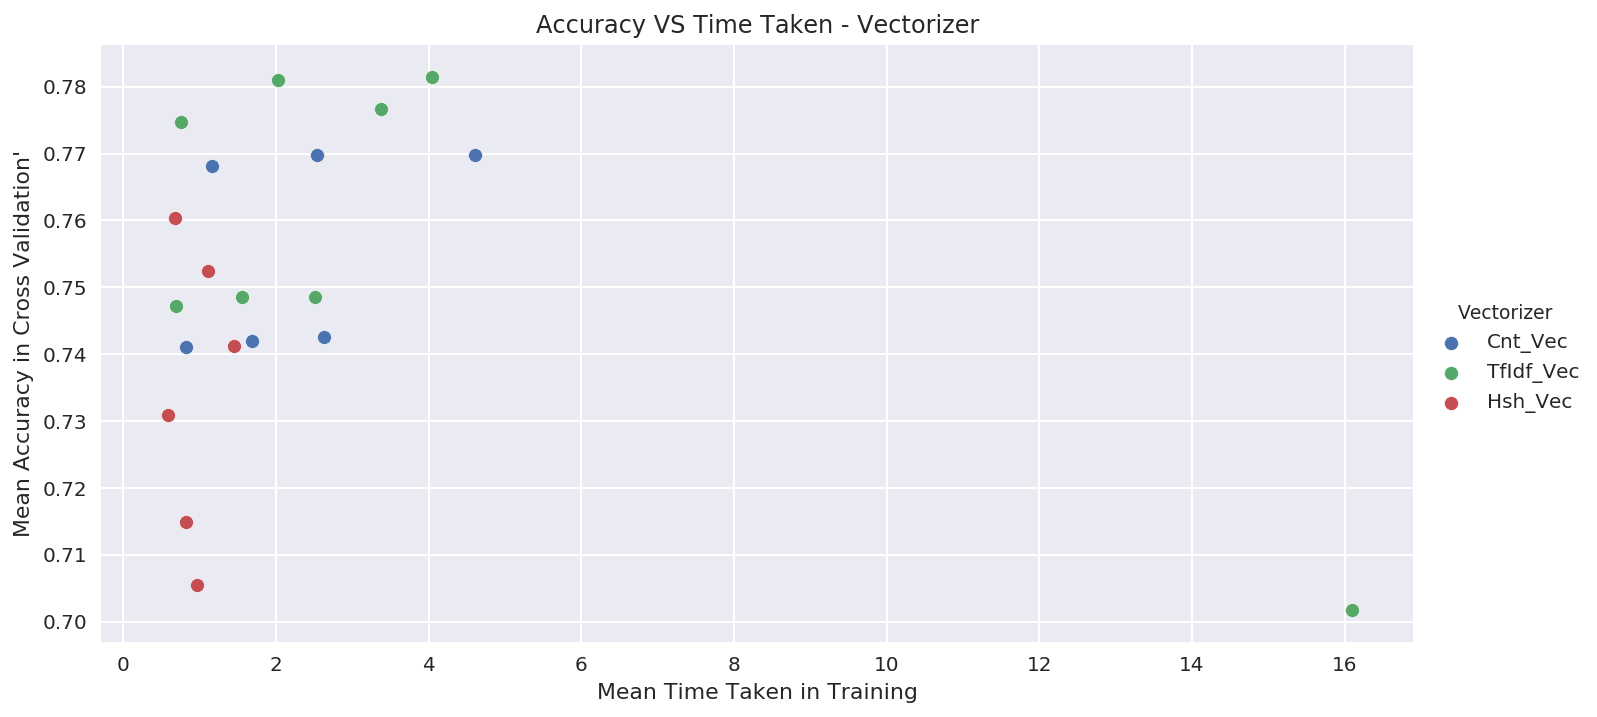

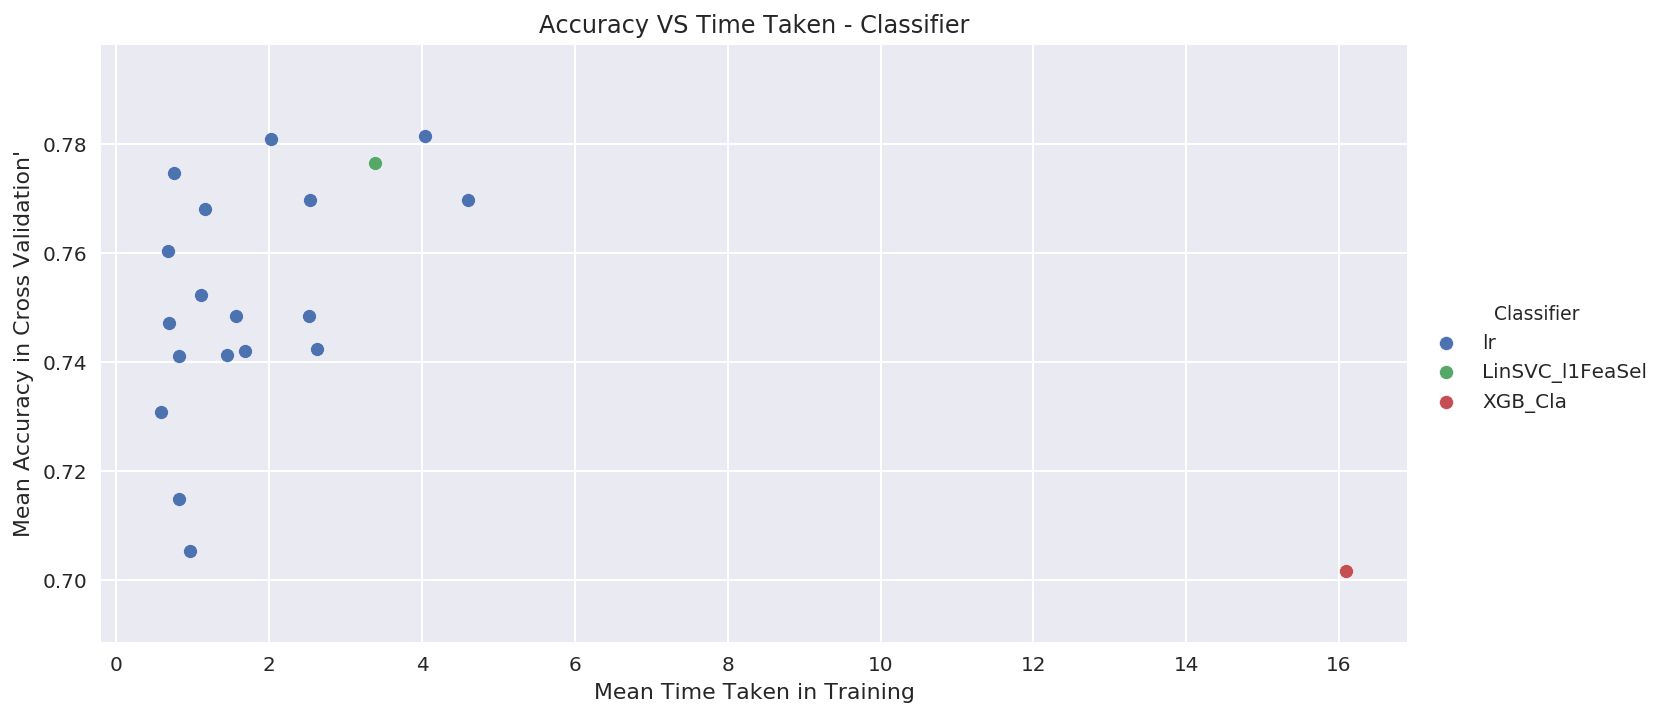

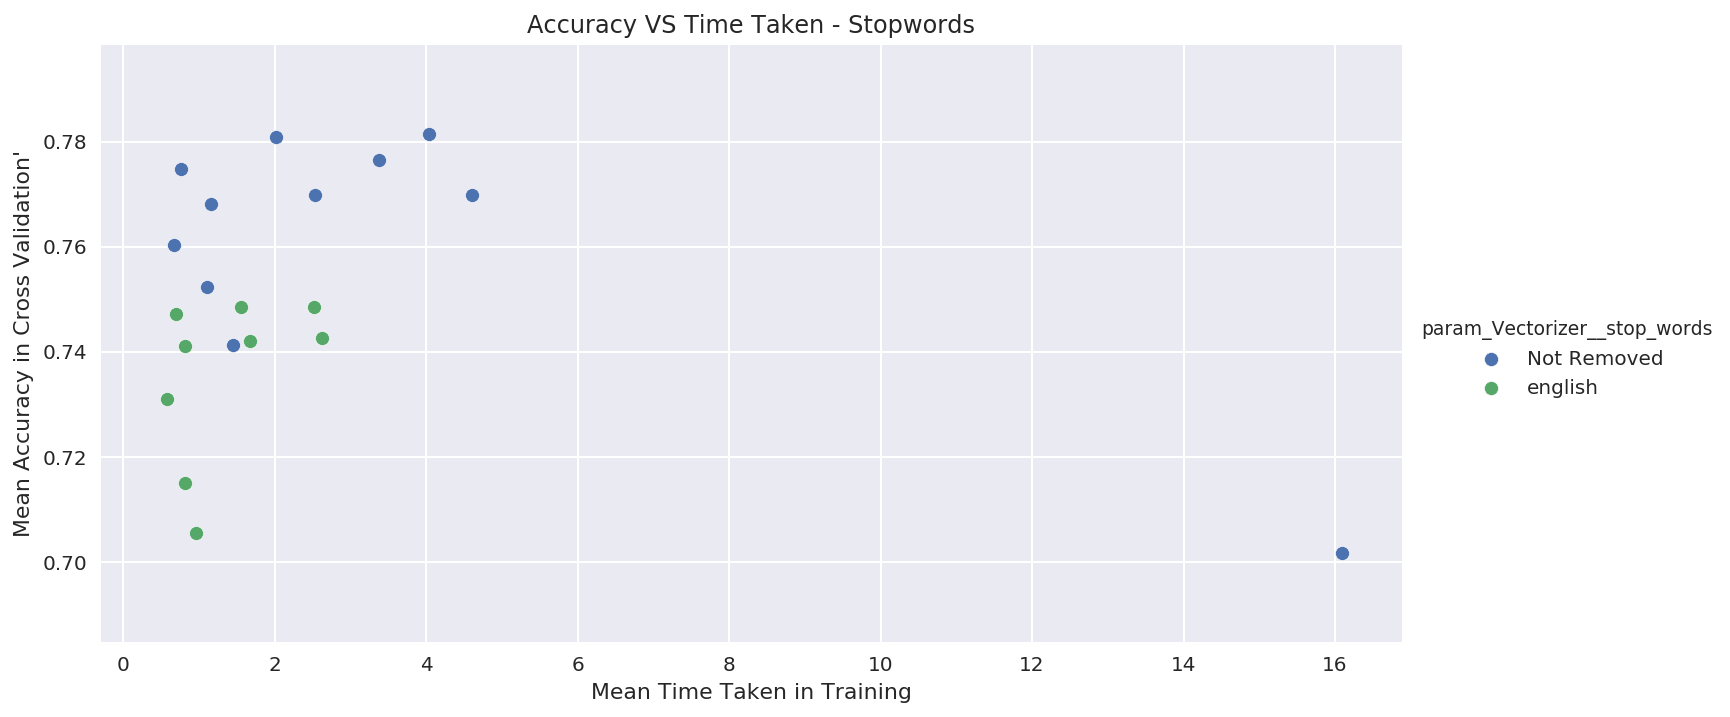

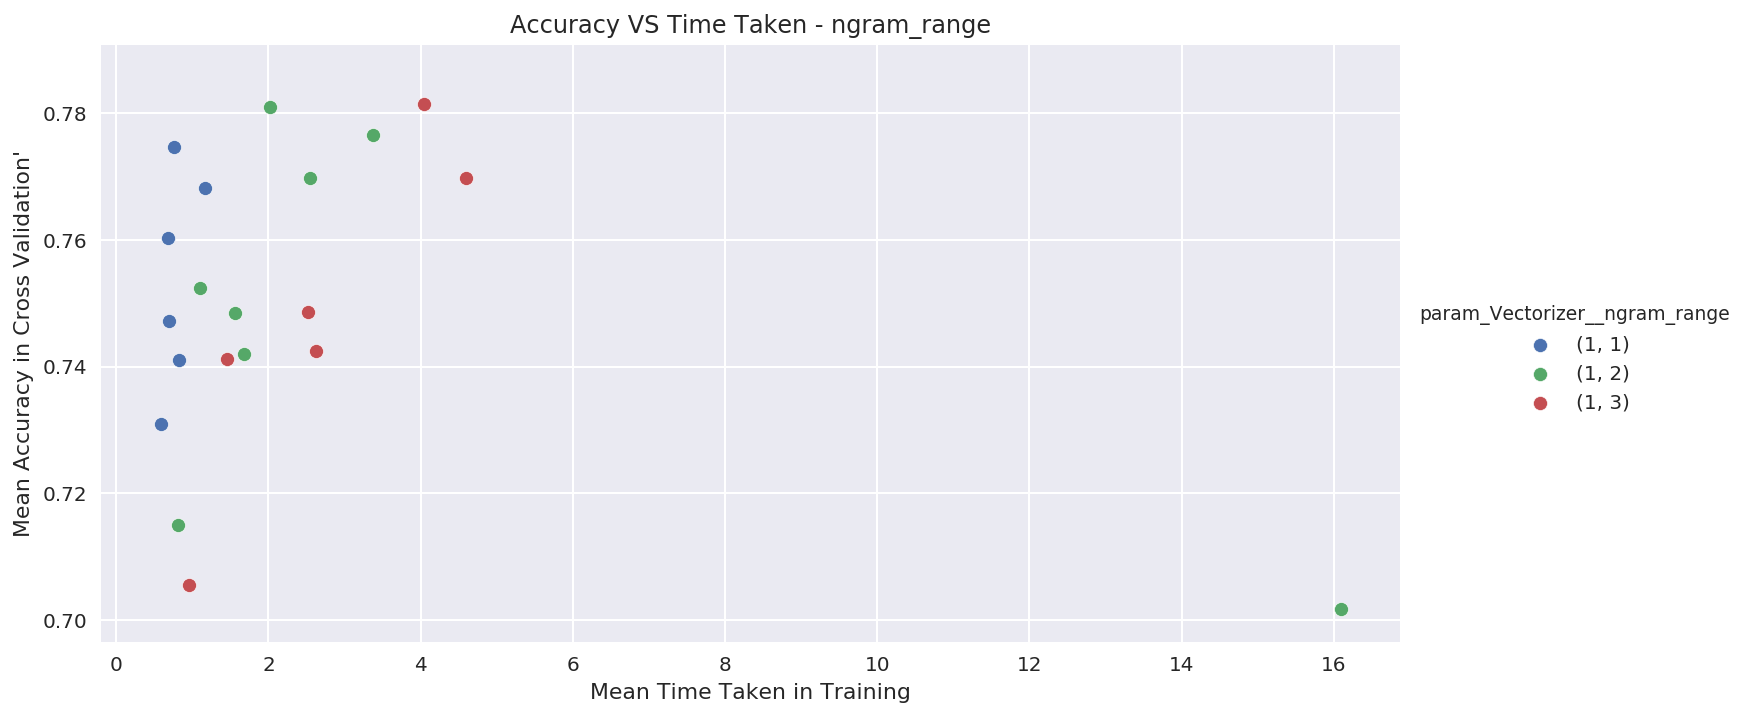

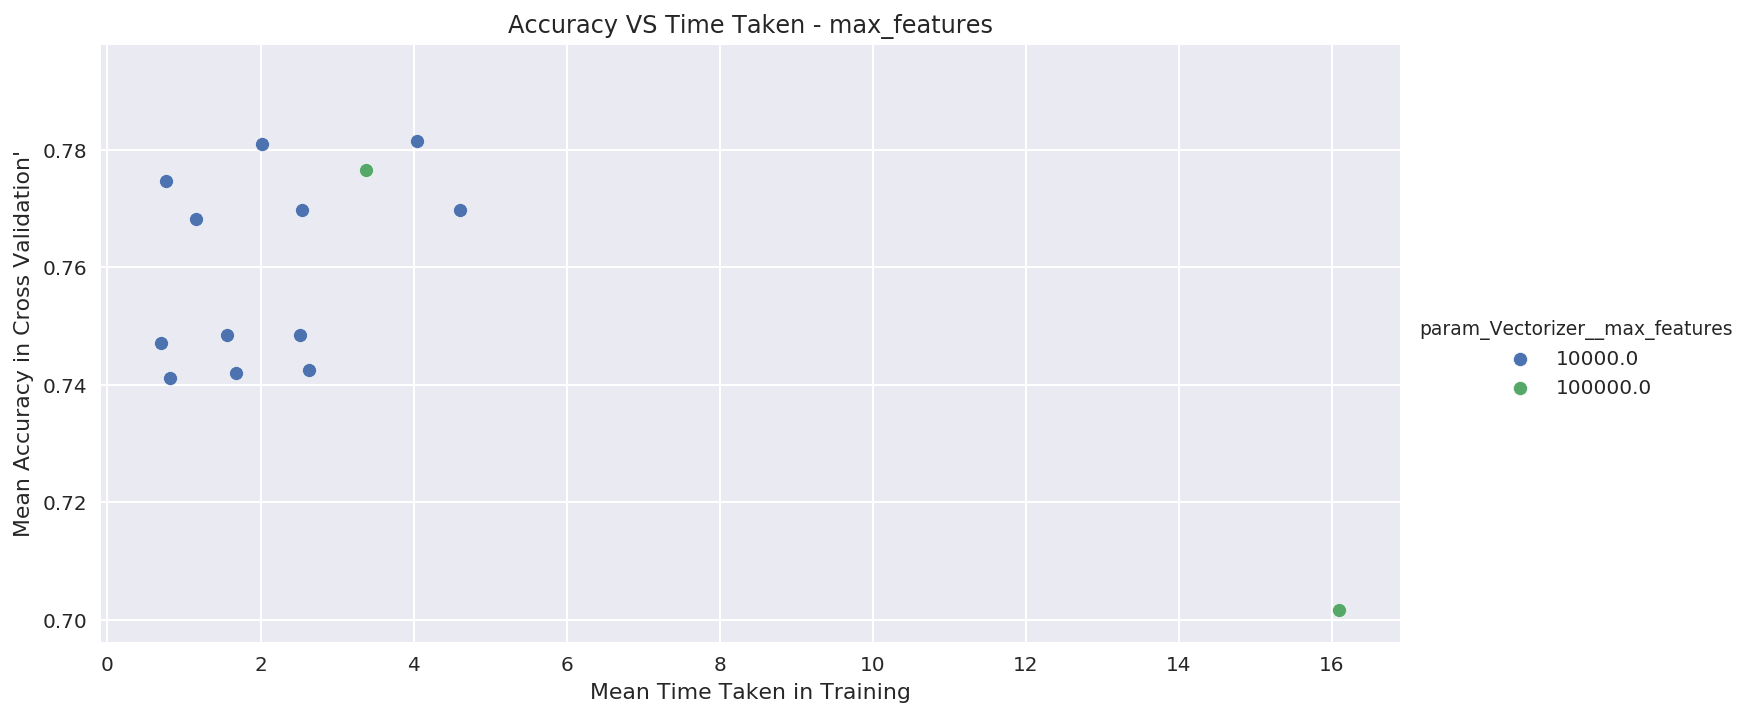

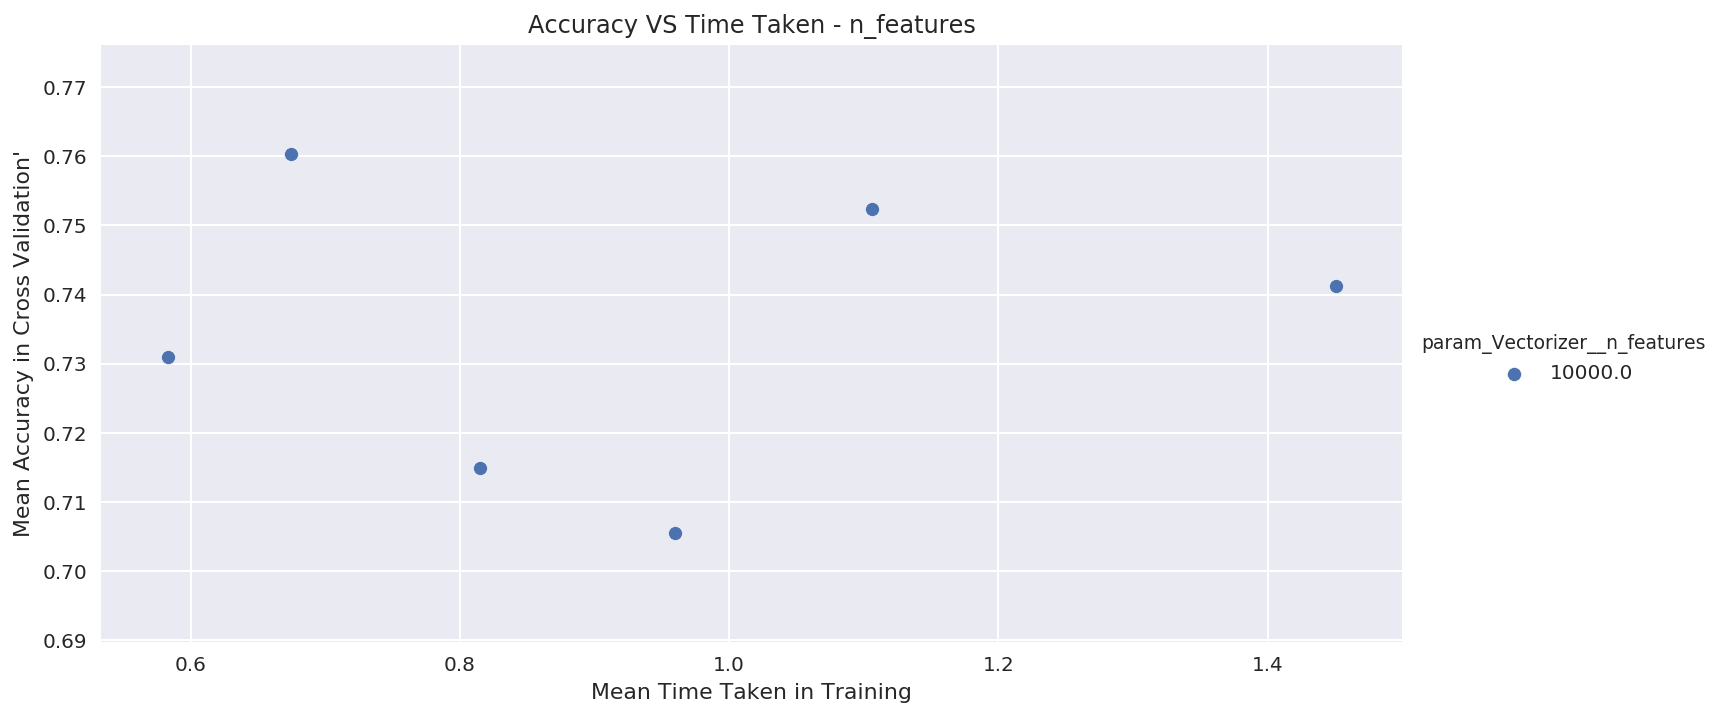

In [653]:
if WorkspaceBasedCheckPt(ChPt):
    
    # sns.set(rc={'figure.figsize':(11.7,5.27)})
    # sns.set_style('whitegrid')

    # fig, ax = plt.subplots(figsize=(10,5))

    # sns.set_style('ticks')
    # fig, ax = plt.subplots()
    # # the size of A4 paper
    # fig.set_size_inches(11.7, 8.27)

    VarToUseInHUE = ["Vectorizer", "Classifier", "param_Vectorizer__stop_words", "param_Vectorizer__ngram_range", "param_Vectorizer__max_features", "param_Vectorizer__n_features"]
    VarName = ["Vectorizer", "Classifier", "Stopwords", "ngram_range", "max_features", "n_features"]
    for plot in range(len(VarToUseInHUE)):

        # sns.set_style('whitegrid')
        MissingValue = 'NA'
        if VarName[plot] == "Stopwords":
            MissingValue = 'Not Removed'
        if VarName[plot] == "max_features" or VarName[plot] == "n_features":
            MissingValue = np.nan

        %config InlineBackend.figure_format = 'retina'
        sns.set()
        sns.pairplot(x_vars=["mean_fit_time"], y_vars=["mean_test_score"], data=AllResult_DF.fillna(MissingValue), hue= VarToUseInHUE[plot], 
                     size=5, aspect = 2) #, palette = "Set2", markers=["o", "s", "D"]
        plt.title("Accuracy VS Time Taken - {}".format(VarName[plot]))
        plt.xlabel("Mean Time Taken in Training")
        plt.ylabel("Mean Accuracy in Cross Validation'")

        # plt.legend(bbox_to_anchor=(1, 1), loc=2)
        # plt.xticks(rotation=-45)
        # plt.ylim(0, None)
        plt.xlim(0, None)
        plt.show()


In [654]:
if WorkspaceBasedCheckPt(ChPt):
    
    print("param: Vectorizer__ngram_range Vectorizer__stop_words Classifier__fit_intercept Vectorizer__max_features'")
    from bokeh.plotting import figure, output_file, show, ColumnDataSource
    from bokeh.models import HoverTool
    output_file("color_scatter.html")

    ### converting to Creates labels for hover
    allLi = []
    for i in Result_DF["params"]:
        ele = []
        for k in i.keys():
            ele.append(str(i[k]))
        allLi.append("\n".join(ele))
    # allLi
    source = ColumnDataSource(data=dict(
        x = AllResult_DF['mean_fit_time'],
        y = AllResult_DF['mean_test_score'] * 100,
        Param = allLi,
    ))

    hover = HoverTool(tooltips=[
        ("(x,y)", "($x, $y)"),
        ("Param", "@Param"),
    ]) #     ("index", "$index"),

    # radii = np.random.random(size=N) * 1.5
    # colors = [
    #     "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
    # ]

    # TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
    p = figure(plot_width=700, plot_height=400, tools= [hover], title="Accuracy vs Time Taken", 
               y_axis_label='Mean Accuracy in Cross Validation', x_axis_label='Mean Time Taken for Training') #, x_range=(0, 70000), y_range=(0, 100)

    p.circle('x', 'y', source=source, color = 'red', size=5, alpha=0.6)

    show(p)

    # print("Parameter Combination for best Score:", Mods_GridSearchCV.best_params_, "\nBest Accuracy:", 100*Mods_GridSearchCV.best_score_)

param: Vectorizer__ngram_range Vectorizer__stop_words Classifier__fit_intercept Vectorizer__max_features'


/usr/local/lib/python3.5/dist-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('Param', 7), ('x', 20), ('y', 20)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: x, y [renderer: GlyphRenderer(id='569ae67e-714d-4e98-bd3c-8d0a6d69d07a', ...)]


Parameter Combination for best Score: {'Vectorizer__ngram_range': (1, 2), 'Vectorizer__stop_words': None, 'Classifier__fit_intercept': True, 'Vectorizer__max_features': 150000} 
Best Accuracy: 78.0813536280861


### Model Ensembling

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    from sklearn.ensemble import VotingClassifier

    clf1 = LogisticRegression()
    clf2 = LinearSVC()
    clf3 = MultinomialNB()
    clf4 = RidgeClassifier()
    clf5 = PassiveAggressiveClassifier()
    eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')


    %%time
    vectorizer_classifier = [{'Vectorizer': Cnt_Vec,
                              'Classifier': eclf,
                              'params': {'Vectorizer__max_features': [i for i in range(10000, 15001, 10000)], 
                                            'Vectorizer__stop_words': [None, 'english'], 
                                            'Vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
                                           }
                             }
                             ]

    EnsembleResult_DF, EnsembleBestResult_DF = GridSearchModsPairs_2(x_TrainDF, y_TrainDF, vectorizer_classifier)

    display(EnsembleBestResult_DF)
    print("Total number of models that were trained(Without including CrossValidation):", len(EnsembleResult_DF))
    display(EnsembleResult_DF)

From above chart, we can see including bigram and trigram boost the model performance both in count vectorizer and TFIDF vectorizer. And for every case of unigram to trigram, TFIDF yields better results than count vectorizer.

It seems like the voting classifier does no better than the simple logistic regression model. Thus later part, I will try to finetune logistic regression model. But before that, I would like to try another method of sentiment classification.

### Developing Model with configured Parameter and testing those



Before I run the defined function, let me briefly explain about confusion matrix and classification report. In order to evaluate the performance of a model, there are many different metrics that can be used. Below I will talk in case of binary classification, in which the target variable only has two classes to be predicted. In the case of this project, the classes are either "negative" or "positive".

One obvious measure of performance can be accuracy. It is the number of times the model predicted correctly for the class over the number of the whole data set. But in case of classification, this can be broken down further. Below is a representation of confusion matrix.


title

In the above matrix, each row represents the instances in an actual class while each column represents the instances in a predicted class, and it can be also presented swapping rows and columns (column for the actual class, row for predicted class). So the accuracy (ACC) I mentioned above can be expressed as below.
$${ACC} = \frac {True Positive + True Negative}{Positive + Negative} = \frac {True Positive + True Negative}{True Positive + False Positive + True Negative + False Negative}$$

When the distribution of the classes in data is well balanced, accuracy can give you a good picture of how the model is performing. But when you have skewed data, for example, one of the class is dominant in your data set, then accuracy might not be enough to evaluate your model. Let's say you have a dataset which contains 80% positive class, and 20% negative class. This means that by predicting every data into the positive class, the model will get 80% accuracy. In this case, you might want to explore further into the confusion matrix and try different evaluation metrics.

There can be 9 different metrics, just from the combination of numbers from confusion matrix, but I will talk about two of them in particular, and another metric which combines these two.

"Precision" (also called Positive Predictive Value) tells you what proportion of data predicted as positive actually is positive. In other words, the proportion of True Positive in the set of all positive predicted data. $${PPV(Precision)} = \frac {True Positive}{True Positive + False Positive}$$

"Recall" (also called Sensitivity, Hit Rate, True Positive Rate) tells you what proportion of data that actually is positive were predicted positive. In other words, the proportion of True Positive in the set of all actual positive data.
$${TPR(Recall)} = \frac {True Positive}{Positive} = \frac {True Positive}{True Positive + False Negative}$$

Below is the image of confusion matrix of cancer diagnose. If you think of "cancer" as positive class, "no cancer" as a negative class, the image explains well how to think of precision and recall in terms of the confusion matrix. title

And finally, the F1 score is the harmonic mean of precision and recall. The harmonic mean is a specific type of average, which is used when dealing with averages of units, like rates and ratios. So by calculating the harmonic mean of the two metrics, it will give you a good idea of how the model is performing both in terms of precision and recall. The formula is as below $${F1} = 2\cdot\frac {Precision\cdot Recall}{Precision + Recall}$$


In [2]:
if WorkspaceBasedCheckPt(ChPt):
    
    def DevelopAndEvalateModelsPair(definateVectorizerClassifier_list, x_TrainDF, y_TrainDF, x_TestDF, y_TestDF):

        for i in range(len(definateVectorizerClassifier_list)):
            t0 = time()
            vectori = varname(definateVectorizerClassifier_list[i]['Vectorizer'])[0]
            classif = varname(definateVectorizerClassifier_list[i]['Classifier'])[0]
            print('Working on the Following pair:', vectori, classif)

            param_grid = [definateVectorizerClassifier_list[i]['params']]
            Mods_Pipe = Pipeline([ ('Vectorizer', vectorizer_classifier_list[i]['Vectorizer']), ('Classifier', vectorizer_classifier_list[i]['Classifier']) ])
            Mods_Pipe.fit(x_TrainDF, y_TrainDF) 
            y_pred = Mods_Pipee.predict(x_TestDF)

            print('Time Taken: {0:.2f}s'.format(time()-t0))
            Plot_Confusion_Matrix(y_TestDF, y_pred)

In [1]:
if WorkspaceBasedCheckPt(ChPt):
    
    %%time
        
    Cnt_Vec1 = CountVectorizer(max_features=80000)
    Cnt_Vec2 = CountVectorizer(max_features=70000,ngram_range=(1, 2))
    Cnt_Vec3 = CountVectorizer(max_features=80000,ngram_range=(1, 3))
    
    FinParams_VectorizerClassifier = [{'defVectorizer': Cnt_Vec1,
                                       'defClassifier': lr
                                       },
                                      {'defVectorizer': Cnt_Vec2,
                                       'defClassifier': lr
                                       },
                                      {'defVectorizer': Cnt_Vec3,
                                       'defClassifier': lr
                                       },
                                      ]

    DevelopAndEvalateModelsPair(FinParams_VectorizerClassifier, x_TrainDF, y_TrainDF, x_TestDF, y_TestDF)

SyntaxError: invalid syntax (<ipython-input-1-5778d9e81191>, line 12)


## Lexical approach

What I have demonstrated above are machine learning approaches to text classification problem, which tries to solve the problem by training classifiers on the labelled data set. Another famous approach to sentiment analysis task is a lexical approach. "In the lexical approach the definition of sentiment is based on the analysis of individual words and/or phrases; emotional dictionaries are often used: emotional lexical items from the dictionary are searched in the text, their sentiment weights are calculated, and some aggregated weight function is applied." http://www.dialog-21.ru/media/1226/blinovpd.pdf

In the previous part, I have calculated harmonic mean of "positive rate CDF" and "positive frequency percent CDF", and these have given me a good representation of positive and negative terms in the corpora. If it successfully filters which terms are important to each class, then this can also be used for prediction in a lexical manner.

So I decided to make a simple predictor, which make use of the harmonic mean value I calculated. Below I go through the term frequency calculation, and the steps to get 'pos_normcdf_hmean', but this time I calculated term frequency only from the train set. (* Since I learned that I don't need to transform sparse matrix to dense matrix for term frequency calculation, I computed the frequency directly from sparse matrix)


In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    from sklearn.feature_extraction.text import CountVectorizer
    CntVec = CountVectorizer(stop_words='english',max_features=10000)
    CntVec.fit(train_DF['clean_text'])

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    
    NegativeDoc_matrix = CntVec.transform(train_DF['clean_text'].loc[train_DF['sentiment_class'] == 0])
    PositiveDoc_matrix = CntVec.transform(train_DF['clean_text'].loc[train_DF['sentiment_class'] == 1])
    print(type(NegativeDoc_matrix), NegativeDoc_matrix.shape)

    Negative_tf = np.sum(NegativeDoc_matrix,axis=0)
    Positive_tf = np.sum(PositiveDoc_matrix,axis=0)
    print(type(Negative_tf), Negative_tf.shape)

    Negative = np.squeeze(np.asarray(Negative_tf))
    Positive = np.squeeze(np.asarray(Positive_tf))
    print(type(Negative), Negative.shape)

    TermFreq_DF2 = pd.DataFrame([Negative,Positive], columns=CntVec.get_feature_names()).transpose()
    print(type(TermFreq_DF2), TermFreq_DF.shape)

    TermFreq_DF2.rename(columns = {0:'Negative', 1:'Positive'}, inplace= True)
    TermFreq_DF2['TotalFreq'] = TermFreq_DF2['Negative'] + TermFreq_DF2['Positive']
    print('DataFrame Shape:', TermFreq_DF2.shape)
    display(TermFreq_DF2.sort_values(by='TotalFreq', ascending=False).head(15))
    
    

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    TermFreq_DF2['PositiveRate'] = TermFreq_DF2['Positive'] * 1./TermFreq_DF2['TotalFreq']
    TermFreq_DF2['NegativeRate'] = TermFreq_DF2['Negative'] * 1./TermFreq_DF2['TotalFreq']
    display(TermFreq_DF2.sort_values(by='PositiveRate', ascending=False).head(10))

    TermFreq_DF2['PositiveFreq_pct'] = TermFreq_DF2['Positive'] * 1./TermFreq_DF2['Positive'].sum()
    TermFreq_DF2['NegativeFreq_pct'] = TermFreq_DF2['Negative'] * 1./TermFreq_DF2['Negative'].sum()
    display(TermFreq_DF2.sort_values(by='PositiveFreq_pct', ascending=False).head(10))

    from scipy.stats import hmean
    TermFreq_DF2['Positive_hmean'] = TermFreq_DF2.apply(lambda x: (hmean([x['PositiveRate'], x['PositiveFreq_pct']])
                                                                       if x['PositiveRate'] > 0 and x['PositiveFreq_pct'] > 0
                                                                       else 0), axis=1)
    TermFreq_DF2['Negative_hmean'] = TermFreq_DF2.apply(lambda x: (hmean([x['NegativeRate'], x['NegativeFreq_pct']])
                                                                       if x['NegativeRate'] > 0 and x['NegativeFreq_pct'] > 0 
                                                                       else 0), axis=1)
    display(TermFreq_DF2.sort_values(by='Positive_hmean', ascending=False).head(10))
    
    
    from scipy.stats import norm
    def normcdf(x):
        return norm.cdf(x, x.mean(), x.std())

    TermFreq_DF2['PositiveRate_normcdf'] = normcdf(TermFreq_DF2['PositiveRate'])
    TermFreq_DF2['PositiveFreq_pct_normcdf'] = normcdf(TermFreq_DF2['PositiveFreq_pct'])
    TermFreq_DF2['Positive_normcdf_hmean'] = hmean([TermFreq_DF2['PositiveRate_normcdf'], TermFreq_DF2['PositiveFreq_pct_normcdf']])
    TermFreq_DF2['NegativeRate_normcdf'] = normcdf(TermFreq_DF2['NegativeRate'])
    TermFreq_DF2['NegativeFreq_pct_normcdf'] = normcdf(TermFreq_DF2['NegativeFreq_pct'])
    TermFreq_DF2['Negative_normcdf_hmean'] = hmean([TermFreq_DF2['NegativeRate_normcdf'], TermFreq_DF2['NegativeFreq_pct_normcdf']])
    display(TermFreq_DF2.sort_values(by='Positive_normcdf_hmean', ascending=False).head(10))
    



The calculation of the positivity score I decided is fairly simple and straightforward. For each word in a document, look it up in the list of 10,000 words I built vocabulary with, and get the corresponding 'pos_normcdf_hmean' value, then for the document calculate the average 'pos_normcdf_hmean' value. If none of the words can be found from the built 10,000 terms, then yields random probability ranging between 0 to 1. And the single value I get for a document is handled as a probability of the document being positive class.

Normally, a lexical approach will take many other aspects into the calculation to refine the prediction result, but I will try a very simple model.


In [156]:
if WorkspaceBasedCheckPt(ChPt):
    pos_hmean = TermFreq_DF2['Positive_normcdf_hmean']
    
    y_val_predicted_proba = []
    for t in x_ValDF:
        hmean_scores = [pos_hmean[w] for w in t.split() if w in pos_hmean.index]
        if len(hmean_scores) > 0:
            prob_score = np.mean(hmean_scores)
        else:
            prob_score = np.random.random()  ## check for this
        y_val_predicted_proba.append(prob_score)

In [157]:
if WorkspaceBasedCheckPt(ChPt):
    print(pos_hmean['wtf'])

0.17881598507301594

In [161]:
if WorkspaceBasedCheckPt(ChPt):
    pred = [1 if t > 0.56 else 0 for t in y_val_predicted_proba]
    Plot_Confusion_Matrix(y_ValDF,pred)

In [163]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_ValDF,pred)

0.7275510204081632

The accuracy is not as good as logistic regression with count vectorizer or TFIDF vectorizer, but compared to null accuracy, 25.56% more accurate, and even compared to TextBlob sentiment analysis, my simple custom lexicon model is 15.31% more accurate. This is an impressive result for such a simple calculation and also considering the fact that the 'pos_normcdf_hmean' is calculated only with the training set. This might be useful later for an ensemble classifier.

<h2><img src="http://sierraexpressmedia.com/wp-content/uploads/2016/01/checkpoint.png" alt="roundtoc" style="float:left;width:60px;height:60px;"><b>&emsp;Checkpoint 5 Reached</b><a class="anchor" id="check5"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;[Checkpoint_Head](#checkpoints)

In [120]:
if WorkspaceBasedCheckPt(ChPt):
    var = %who_ls
    ThingsToKeep = ['glob', 'dill', 'np', 'os', 'pd', 'plt', 'sns', 'time', 'WorkspaceBasedCheckPt', 'config', 'ChPt', 'TermFreq_DF', 'TermFreq_DF2', 'test_DF', 'train_DF', 'x_TestDF', 'x_TrainDF', 'x_ValDF', 'y_TestDF', 'y_TrainDF', 'y_ValDF']
    print("Things that can be removed from workspace")
    print(", ".join([i for i in var if i not in ThingsToKeep]))

Running this cell
Things that can be removed from workspace
ConfMat, CountVectorizer, LogisticRegression, Pipeline, TB_Predict, TB_Result, TextBlob, ThingsToKeep, TrainDF, accuracy_score, accuracy_summary, classification_report, confusion, confusion_matrix, cvec, feature_result_ug, feature_result_wosw, lr, n_features, nfeature_accuracy_checker, train_test_split, var


In [122]:
if WorkspaceBasedCheckPt(ChPt):
    del(TextBlob)

Running this cell


In [123]:
WorkspaceBasedCheckPt(ChPt, True)
ChPt = 6

Congrats, on reaching a new checkpoint, saving it.


In [124]:
%whos

Variable                    Type                          Data/Info
-------------------------------------------------------------------
ChPt                        int                           6
ConfMat                     ndarray                       2x2: 4 elems, type `int64`, 32 bytes
CountVectorizer             type                          <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
LogisticRegression          type                          <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
Pipeline                    ABCMeta                       <class 'sklearn.pipeline.Pipeline'>
TB_Predict                  list                          n=980
TB_Result                   list                          n=980
TermFreq_DF                 DataFrame                                       Negativ<...>n[44860 rows x 3 columns]
TermFreq_DF2                DataFrame                                 Negative  Pos<...>[10000 rows x 15 columns]
ThingsToKeep                lis

## Doc2Vec
Before we jump into doc2vec, it will be better to first start by word2vec. "Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words."

Word2vec is not a single algorithm but consists of two techniques – CBOW(Continuous bag of words) and Skip-gram model. Both of these techniques learn weights which act as word vector representations. With a corpus, CBOW model predicts the current word from a window of surrounding context words, while Skip-gram model predicts surrounding context words given the current word. In Gensim package, you can specify whether to use CBOW or Skip-gram by passing the argument "sg" when implementing Word2Vec. By default (sg=0), CBOW is used. Otherwise (sg=1), skip-gram is employed.

For example, let's say we have the following sentence: "I love dogs". CBOW model tries to predict the word "love" when given "I", "dogs" as inputs, on the other hand, Skip-gram model tries to predict "I", "dogs" when given the word "love" as input.

Below picture represents more formally how these two models work.
![]()

But what's used as word vectors are actually not the predicted results from these models but the weights of the trained models. By extracting the weights, such a vector comes to represent in some abstract way the ‘meaning’ of a word.

Then what is doc2vec? Doc2vec uses the same logic as word2vec, but apply this to the document level. According to Mikolov et al. (2014), "every paragraph is mapped to a unique vector, represented by a column in matrix D and every word is also mapped to a unique vector, represented by a column in matrix W. The paragraph vector and word vectors are averaged or concatenated to predict the next word in a context...The paragraph token can be thought of as another word. It acts as a memory that remembers what is missing from the current context – or the topic of the paragraph." https://cs.stanford.edu/~quocle/paragraph_vector.pdf
  
![]()
  
DM: This is the Doc2Vec model analogous to CBOW model in Word2vec. The paragraph vectors are obtained by training a neural network on the task of inferring a centre word based on context words and a context paragraph.

DBOW: This is the Doc2Vec model analogous to Skip-gram model in Word2Vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

I implemented Doc2Vec model using a Python library, Gensim. In case of DM model, I implemented averaging and concatenating. This is inspired by the research paper from Le and Mikolov (2014). In their paper, they have implemented DM model in two different way, using average calculation process for the paragraph matrix, and concatenating calculation method for the paragraph matrix. This has also been shown in Gensim's tutorial.

Below are the methods I used to get the vectors for each tweet.

DBOW (Distributed Bag of Words)
DMC (Distributed Memory Concatenated)
DMM (Distributed Memory Mean)
DBOW + DMC
DBOW + DMM
With above vectors, I fit a simple logistic regression model and evaluated the result on the validation set.


In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    from tqdm import tqdm
    tqdm.pandas(desc="progress-bar")
    from gensim.models import Doc2Vec
    from gensim.models.doc2vec import LabeledSentence
    import multiprocessing
    from sklearn import utils

In [ ]:
if WorkspaceBasedCheckPt(ChPt):
    def labelize_tweets_ug(tweets,label):
        result = []
        prefix = label
        for i, t in zip(tweets.index, tweets):
            result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
        return result

For training Doc2Vec, I used the whole data set. The rationale behind this is that the doc2vec training is completely unsupervised and thus there is no need to hold out any data, as it is unlabelled. This rationale is inspired by the rationale of Lau and Baldwin (2016) in their research paper "An Empirical Evaluation of doc2vec with Practical Insights into Document Embedding Generation" https://arxiv.org/pdf/1607.05368.pdf

Also, the same rationale has been applied in the Gensim's Doc2Vec tutorial. In the IMDB tutorial, vector training is occurring on all documents of the data set, including all train/test/dev set. https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/doc2vec-IMDB.ipynb

In [165]:
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

NameError: name 'x_train' is not defined

In [ ]:
len(all_x_w2v)

### DBOW

In [ ]:
model_ug_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

According to the developer Radim Řehůřek who created Gensim, "One caveat of the way this algorithm runs is that, since the learning rate decrease over the course of iterating over the data, labels which are only seen in a single LabeledSentence during training will only be trained with a fixed learning rate. This frequently produces less than optimal results."

Below iteration implement explicit multiple-pass, alpha-reduction approach with added shuffling. This has been already presented in Gensim's IMDB tutorial.

In [ ]:
%%time
for epoch in range(30):
    model_ug_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dbow.alpha -= 0.002
    model_ug_dbow.min_alpha = model_ug_dbow.alpha

In [ ]:
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs

In [ ]:

train_vecs_dbow = get_vectors(model_ug_dbow, x_train, 100)
validation_vecs_dbow = get_vectors(model_ug_dbow, x_validation, 100)

In [ ]:
clf = LogisticRegression()
clf.fit(train_vecs_dbow, y_train)

In [ ]:
clf.score(validation_vecs_dbow, y_validation)

Even though the DBOW model doesn't learn the meaning of the individual words, but as features to feed to a classifier, it seems like it's doing its job.

But the result doesn't seem to excel count vectorizer or Tfidf vectorizer. It might not be a direct comparison since either count vectorizer of Tfidf vectorizer uses a large number of features to represent a tweet, but in this case, a vector for each tweet has only 200 dimensions.

In [ ]:
model_ug_dbow.save('d2v_model_ug_dbow.doc2vec')
model_ug_dbow = Doc2Vec.load('d2v_model_ug_dbow.doc2vec')

In [ ]:
model_ug_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### Distributed Momory (concatenated)

In [ ]:
cores = multiprocessing.cpu_count()
model_ug_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmc.build_vocab([x for x in tqdm(all_x_w2v)])

In [ ]:
%%time
for epoch in range(30):
    model_ug_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dmc.alpha -= 0.002
    model_ug_dmc.min_alpha = model_ug_dmc.alpha

In [ ]:
model_ug_dmc = Doc2Vec.load('d2v_model_ug_dmc.doc2vec')

What's nice about Doc2Vec is that after training you can retrieve not only document vectors but also individual word vectors as well. Note, however, that a Doc2Vec DBOW model doesn't learn semantic word vectors, so the word vectors you retrieve from pure DBOW model will be the automatic randomly-initialized vectors, with no meaning. But with DM model, you can see the semantic relationship between words. Let's see what word vectors it has learned through training.

In [ ]:
model_ug_dmc.most_similar('good')

In [ ]:
model_ug_dmc.most_similar('happy')

What's interesting with DMC model is, somehow it learned all the misspelled version of a word as you can see from the above.

In [ ]:
model_ug_dmc.most_similar('facebook')

In [ ]:
model_ug_dmc.most_similar(positive=['bigger', 'small'], negative=['big'])

The model successfully catches the comparative form of "small", on feeding the word "big" and "bigger". The above line of code is like asking the model to add the vectors associated with the word "bigger" and "small" while subtracting "big" is equal to the top result, "smaller".

In [ ]:
train_vecs_dmc = get_vectors(model_ug_dmc, x_train, 100)
validation_vecs_dmc = get_vectors(model_ug_dmc, x_validation, 100)

In [ ]:
clf = LogisticRegression()
clf.fit(train_vecs_dmc, y_train)

In [ ]:
clf.score(validation_vecs_dmc, y_validation)

In [ ]:
model_ug_dmc.save('d2v_model_ug_dmc.doc2vec')
model_ug_dmc = Doc2Vec.load('d2v_model_ug_dmc.doc2vec')
model_ug_dmc.delete_temporary_training_data(keep_doctags_vectors

### Distributed Memory (mean)

In [ ]:
cores = multiprocessing.cpu_count()
model_ug_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmm.build_vocab([x for x in tqdm(all_x_w2v)])

In [ ]:
%%time
for epoch in range(30):
    model_ug_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dmm.alpha -= 0.002
    model_ug_dmm.min_alpha = model_ug_dmm.alpha

In [ ]:
model_ug_dmm.most_similar('good')

In [ ]:
model_ug_dmc.most_similar('happy')

In [ ]:
train_vecs_dmm = get_vectors(model_ug_dmm, x_train, 100)
validation_vecs_dmm = get_vectors(model_ug_dmm, x_validation, 100)

In [ ]:
clf = LogisticRegression()
clf.fit(train_vecs_dmm, y_train)

In [ ]:
clf.score(validation_vecs_dmm, y_validation)

In [ ]:
model_ug_dmm.save('d2v_model_ug_dmm.doc2vec')
model_ug_dmm = Doc2Vec.load('d2v_model_ug_dmm.doc2vec')
model_ug_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

Since I have the document vectors from four different models, now I can concatenate them in combination to see how it affects the performance. Below I defined a simple function to concatenate document vectors from different models.

In [ ]:
def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
        n += 1
    return vecs

In [ ]:
train_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_train, 200)
validation_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_validation, 200)

In [ ]:
%%time
clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmc, y_train)

In [ ]:
clf.score(validation_vecs_dbow_dmc, y_validation)

In [ ]:
train_vecs_dbow_dmm = get_concat_vectors(model_ug_dbow,model_ug_dmm, x_train, 200)
validation_vecs_dbow_dmm = get_concat_vectors(model_ug_dbow,model_ug_dmm, x_validation, 200)

In [ ]:
%%time
clf = LogisticRegression()
clf.fit(train_vecs_dbow_dmm, y_train)

In [ ]:
clf.score(validation_vecs_dbow_dmm, y_validation)

In case of unigram, concatenating document vectors in different combination boosted the model performance. The best validation accuracy I got from a single model is from DBOW at 73.89%. With concatenated vectors, I get the highest validation accuracy of 75.51% with DBOW+DMM model.

# Twitter API trial

In [ ]:
import tweepy
import hidden
import sqlite3
from langdetect import detect

In [ ]:
auth = tweepy.OAuthHandler(hidden.consumer_key, hidden.consumer_secret)
auth.set_access_token(hidden.token_key, hidden.token_secret)
api = tweepy.API(auth)

In [ ]:
places = api.geo_search(query="London", granularity="city")

place_id_L = places[0].id
print('London id is: ',place_id_L)

In [ ]:
places = api.geo_search(query="Brighton", granularity="city")

place_id_B = places[0].id
print('Brighton id is: ',place_id_B)

In [ ]:
places = api.geo_search(query="Edinburgh", granularity="city")

place_id_E = places[0].id
print('Edinburgh id is: ',place_id_E)

In [ ]:
maxitems = 10
print "London tweets retrieve testing"
print '----------------------------------'
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_L).items(maxitems):
    print tweet.text

In [ ]:
maxitems = 10
print "Brighton tweets retrieve testing"
print '----------------------------------'
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_B).items(maxitems):
    print tweet.text

In [ ]:
maxitems = 10
print "Edinburgh tweets retrieve testing"
print '---------------------------------'
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_E).items(maxitems):
    print tweet.text

In [ ]:
conn = sqlite3.connect('twitter_testing.sqlite')
cur = conn.cursor()
cur.executescript('''

CREATE TABLE Tweets_London (
    id     INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    user_id TEXT,
    user_name TEXT,
    user_timezone TEXT,
    user_language TEXT,
    detected_language TEXT,
    tweet_text  TEXT,
    tweet_created TEXT
)
''')

In [ ]:
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_L).items(maxitems):
    detected = detect(tweet.text)
    cur.execute('''INSERT OR IGNORE INTO Tweets_London (
        user_id, user_name, user_timezone, user_language, detected_language, tweet_text, tweet_created
        ) 
    VALUES ( ?,?,?,?,?,?,? )''', (tweet.user.id,tweet.user.screen_name,tweet.user.time_zone,tweet.user.lang,detected,tweet.text,tweet.created_at))
    conn.commit()

In [ ]:
from_sql = pd.read_sql_query("SELECT * FROM Tweets_London;", conn)

In [ ]:
from_sql

In [509]:
# def ComputeAccuracy(Mod_Pipeline, train_x, train_y, test_x, test_y):
#     ## Computing the baseline accuracy
#     BaselineAcc = len(test_x[test_y == 0]) / (len(test_y)*1.)
#     if BaselineAcc < 0.5:
#         BaselineAcc = 1. - BaselineAcc
#     else:
#         BaselineAcc = BaselineAcc
    
#     t0 = time()
#     ## Fitting Models that were provided with pipeline
#     Models_SequentialFit = Mod_Pipeline.fit(train_x, train_y)
#     pred_y = Models_SequentialFit.predict(test_x)
#     ## Computing the Time Consumed
#     TrainPred_Time = time() - t0
#     accuracy = accuracy_score(test_x, pred_y)

#     print("Baseline accuracy: {0:.2f}%".format(BaselineAcc*100))
#     print("Accuracy score: {0:.2f}%".format(accuracy*100))
    
#     if accuracy > null_accuracy:
#         print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-BaselineAcc)*100))
#     elif accuracy == null_accuracy:
#         print("model has the same accuracy with the null accuracy")
#     else:
#         print("model is {0:.2f}% less accurate than null accuracy".format((BaselineAcc-accuracy)*100))
    
#     print("train and test time: {0:.2f}s".format(TrainPred_Time))
#     print("-"*80)
#     return accuracy, TrainPred_Time

# cvec = CountVectorizer()
# lr = LogisticRegression()
# n_features = np.arange(10000,100001,10000)

# def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
#     result = []
#     print(classifier)
#     print("\n")
#     for n in n_features:
#         vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
#         checker_pipeline = Pipeline([ ('vectorizer', vectorizer), ('classifier', classifier) ])
        
#         print("Validation result for {} features".format(n))
#         nfeature_accuracy, time_consumed = ComputeAccuracy(checker_pipeline, x_TrainDF, y_TrainDF, x_ValDF, y_ValDF)
#         result.append((n, nfeature_accuracy, time_consumed))
#     return result

# %%time
# print("RESULT FOR UNIGRAM WITHOUT STOP WORDS BEING PRESENT IN THE DATA\n")
# feature_result_wosw = nfeature_accuracy_checker(stop_words='english')


# tvec = TfidfVectorizer()
# def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
#     result = []
#     vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
#     for n,c in classifier:
#         checker_pipeline = Pipeline([
#             ('vectorizer', vectorizer),
#             ('classifier', c)
#         ])
#         print("Validation result for {}".format(n))
#         print(c)
#         clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_TrainDF, y_TrainDF, x_ValDF, y_ValDF)
#         result.append((n,clf_accuracy,tt_time))
#     return result

In [510]:


# names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
#          "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
# classifiers = [
#     LogisticRegression(),
#     LinearSVC(),
#     Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
#   ('classification', LinearSVC(penalty="l2"))]),
#     MultinomialNB(),
#     BernoulliNB(),
#     RidgeClassifier(),
#     AdaBoostClassifier(),
#     Perceptron(),
#     PassiveAggressiveClassifier(),
#     NearestCentroid()
#     ]
# zipped_clf = zip(names,classifiers)

In [ ]:
# # Set figure size with matplotlib
# plt.figure(figsize=(10,6))

# pkmn_type_colors = ['#78C850',  # Grass
#                     '#F08030',  # Fire
#                     '#6890F0',  # Water
#                     '#A8B820',  # Bug
#                     '#A8A878',  # Normal
#                     '#A040A0',  # Poison
#                     '#F8D030',  # Electric
#                     '#E0C068',  # Ground
#                     '#EE99AC',  # Fairy
#                     '#C03028',  # Fighting
#                     '#F85888',  # Psychic
#                     '#B8A038',  # Rock
#                     '#705898',  # Ghost
#                     '#98D8D8',  # Ice
#                     '#7038F8',  # Dragon
#                    ]

# # Violin plot with Pokemon color palette
# sns.violinplot(x='Type 1', y='Attack', data=df, 
#                palette=pkmn_type_colors) # Set color palette

# # Swarm plot with Pokemon color palette
# sns.swarmplot(x='Type 1', y='Attack', data=df, 
#               palette=pkmn_type_colors)

# # Violin plot
# sns.violinplot(x='Type 1', y='Attack', data=df)

# # sns.boxplot(data=df)
# # Plot using Seaborn
# sns.lmplot(x='Attack', y='Defense', data=df,
#            fit_reg=False, 
#            hue='Stage', legend=False, palette="Set2")

# # sns.plt.show()
# sns.axes_style()
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# {'axes.axisbelow': True,
#  'axes.edgecolor': '.8',
#  'axes.facecolor': 'white',
#  'axes.grid': True,
#  'axes.labelcolor': '.15',
#  'axes.linewidth': 1.0,
#  'figure.facecolor': 'white',
#  'font.family': [u'sans-serif'],
#  'font.sans-serif': [u'Arial',
#   u'DejaVu Sans',
#   u'Liberation Sans',
#   u'Bitstream Vera Sans',
#   u'sans-serif'],
#  'grid.color': '.8',
#  'grid.linestyle': u'-',
#  'image.cmap': u'rocket',
#  'legend.frameon': False,
#  'legend.numpoints': 1,
#  'legend.scatterpoints': 1,
#  'lines.solid_capstyle': u'round',
#  'text.color': '.15',
#  'xtick.color': '.15',
#  'xtick.direction': u'out',
#  'xtick.major.size': 0.0,
#  'xtick.minor.size': 0.0,
#  'ytick.color': '.15',
#  'ytick.direction': u'out',
#  'ytick.major.size': 0.0,
#  'ytick.minor.size': 0.0}



In [134]:
# def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
#     if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
#         null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
#     else:
#         null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
#     sentiment_fit = pipeline.fit(x_train, y_train)
#     y_pred = sentiment_fit.predict(x_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
#     confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
#                          columns=['predicted_negative','predicted_positive'])
#     print("null accuracy: {0:.2f}%".format(null_accuracy*100))
#     print("accuracy score: {0:.2f}%".format(accuracy*100))
#     if accuracy > null_accuracy:
#         print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
#     elif accuracy == null_accuracy:
#         print("model has the same accuracy with the null accuracy")
#     else:
#         print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
#     print("-"*80)
#     print("Confusion Matrix\n")
#     print(confusion)
#     print("-"*80)
#     print("Classification Report\n")
#     print(classification_report(y_test, y_pred, target_names=['negative','positive']))

# %%time
# ug_cvec = CountVectorizer(max_features=80000)
# ug_pipeline = Pipeline([ ('vectorizer', ug_cvec), ('classifier', lr) ])
# train_test_and_evaluate(ug_pipeline, x_TrainDF, y_TrainDF, x_ValDF, y_ValDF)